# DICE SM - Exploration & Global Sensitivity Analysis

## Setup & Initialisation of levers and uncertainties 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import itertools

import time
import os 
os.chdir(os.getcwd())
import sys
# insert at 1, 0 is the script path (or '' in REPL)
pydice_folder = os.path.dirname(os.getcwd())+"\\1_Model"
sys.path.insert(1, pydice_folder)

from SALib.analyze import sobol

from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments, LHS, SOBOL, MORRIS
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.analysis import feature_scoring
# from ema_workbench.analysis.scenario_discovery_util import CLASSIFICATION, REGRESSION

from ema_workbench.util import ema_logging
from ema_workbench import (perform_experiments, Model, Policy, Scenario, ReplicatorModel, RealParameter, IntegerParameter, ScalarOutcome, ArrayOutcome, 
                           Constant, ema_logging, SequentialEvaluator, MultiprocessingEvaluator, IpyparallelEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)

from PyDICE_V4 import PyDICE

C:\Users\Shajee\Anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)
C:\Users\Shajee\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Shajee\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Shajee\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
model = PyDICE()
dice_sm = Model('dicesmEMA', function = model)

## Exploration

In [3]:
dice_sm.uncertainties = [IntegerParameter('t2xco2_index', 0, 999),
                         IntegerParameter('t2xco2_dist',0,2),
                         IntegerParameter('fdamage',0,2),
                         RealParameter('tfp_gr',  0.07, 0.09),
                         RealParameter('sigma_gr', -0.012, -0.008),
                         RealParameter('pop_gr', 0.1, 0.15),
                         RealParameter('fosslim',  4000.0, 13649),
                         IntegerParameter('cback', 100, 600)]

dice_sm.levers = [RealParameter('sr', 0.1, 0.5),
                  RealParameter('irstp',  0.001, 0.015),
                  IntegerParameter('periodfullpart', 10, 58),
                  IntegerParameter('miu_period', 10, 58)]

dice_sm.outcomes = [ScalarOutcome('Atmospheric Temperature 2010', ScalarOutcome.INFO),
                    ScalarOutcome('Damages 2010', ScalarOutcome.INFO),
                    ScalarOutcome('Utility 2010', ScalarOutcome.INFO),
                    ScalarOutcome('Total Output 2010', ScalarOutcome.INFO),
                    ScalarOutcome('Atmospheric Temperature 2050', ScalarOutcome.MINIMIZE),
                    ScalarOutcome('Damages 2050', ScalarOutcome.MINIMIZE),
                    ScalarOutcome('Utility 2050', ScalarOutcome.MAXIMIZE),
                    ScalarOutcome('Total Output 2050', ScalarOutcome.MAXIMIZE),
                    ScalarOutcome('Atmospheric Temperature 2100', ScalarOutcome.MINIMIZE),
                    ScalarOutcome('Damages 2100', ScalarOutcome.MINIMIZE),
                    ScalarOutcome('Utility 2100', ScalarOutcome.MAXIMIZE),
                    ScalarOutcome('Total Output 2100', ScalarOutcome.MAXIMIZE),
                    ScalarOutcome('Atmospheric Temperature 2150', ScalarOutcome.MINIMIZE),
                    ScalarOutcome('Damages 2150', ScalarOutcome.MINIMIZE),
                    ScalarOutcome('Utility 2150', ScalarOutcome.MAXIMIZE),
                    ScalarOutcome('Total Output 2150', ScalarOutcome.MAXIMIZE),
                    ScalarOutcome('Atmospheric Temperature 2200', ScalarOutcome.MINIMIZE),
                    ScalarOutcome('Damages 2200', ScalarOutcome.MINIMIZE),
                    ScalarOutcome('Utility 2200', ScalarOutcome.MAXIMIZE),
                    ScalarOutcome('Total Output 2200', ScalarOutcome.MAXIMIZE),
                    ScalarOutcome('Atmospheric Temperature 2300', ScalarOutcome.MINIMIZE),
                    ScalarOutcome('Damages 2300', ScalarOutcome.MINIMIZE),
                    ScalarOutcome('Utility 2300', ScalarOutcome.MAXIMIZE),
                    ScalarOutcome('Total Output 2300', ScalarOutcome.MAXIMIZE)]

In [4]:
n_scenarios=10000
n_policies=60

# start = time.time()
# with MultiprocessingEvaluator(dice_sm) as evaluator:
#     results = evaluator.perform_experiments(scenarios=n_scenarios, policies=n_policies)
# end = time.time()

# print('Experiment time is ' + str(round((end - start)/60)) + ' mintues')

In [5]:
from ema_workbench import save_results, load_results

file_name = dir_path + 'open_exploration_V4_' + str(n_scenarios) + 'k_' + str(n_policies) + '.tar.gz'
# save_results(results, file_name)
results = load_results(file_name)

[MainProcess/INFO] results loaded succesfully from C:\Users\Shajee\Documents\Studium\Thesis\PyDICE\open_exploration_V4_10000k_60.tar.gz


In [6]:
experiments, outcomes = results

### Pairplots

#### Effect of distributions on the output

In [10]:
out_DF = pd.DataFrame(outcomes)

In [11]:
out_DF.head()

Atmospheric Temperature 2010  Damages 2010  Utility 2010  \
0                           0.8      0.091945  -3656.737311   
1                           0.8      0.108649  -3656.795166   
2                           0.8      0.108649  -3656.794613   
3                           0.8      0.108649  -3656.794455   
4                           0.8      0.108649  -3656.794453   

   Total Output 2010  Atmospheric Temperature 2050  Damages 2050  \
0          63.489685                      2.255237      2.887247   
1          63.472938                      1.747150      1.278168   
2          63.473098                      0.704115      0.211735   
3          63.473144                      2.087924      1.769569   
4          63.473144                      1.510621      0.965704   

   Utility 2050  Total Output 2050  Atmospheric Temperature 2100  \
0  -1594.728971         153.808839                      3.398145   
1  -1614.054405         153.109797                      2.197591   
2  -1575.308220         158.270402                      0.666836   
3  -1661.161737         149.192230                      2.947723   
4  -1593.088341         156.467156                      1.748889   

   Damages 2100  ...  Utility 2150  Total Output 2150  \
0     18.999876  ...   3925.893130         694.508652   
1      5.034083  ...   3918.488934         718.357368   
2      0.474681  ...   4073.155609         741.363476   
3      8.947049  ...   3790.694526         721.360562   
4      3.255341  ...   4034.465229         744.436068   

   Atmospheric Temperature 2200  Damages 2200  Utility 2200  \
0                      1.192930      4.543428   5766.729295   
1                      0.261543      0.216464   5762.549420   
2                      0.000000      0.000000   5925.593486   
3                      1.338711      5.665296   5627.420642   
4                      0.561154      1.002865   5887.098572   

   Total Output 2200  Atmospheric Temperature 2300  Damages 2300  \
0        1159.670424                           0.0           0.0   
1        1166.274360                           0.0           0.0   
2        1180.810147                           0.0           0.0   
3        1171.708025                           0.0           0.0   
4        1186.277547                           0.0           0.0   

   Utility 2300  Total Output 2300  
0   7890.200471        2849.518370  
1   7885.532403        2848.775515  
2   8050.922385        2858.221538  
3   7749.151203        2861.759668  
4   8013.083215        2864.614208  

[5 rows x 24 columns]

In [12]:
t2xco2_dist = experiments['t2xco2_dist']

out_DF['t2xco2_dist'] = t2xco2_dist

In [13]:
out_DF['t2xco2_dist'] = out_DF['t2xco2_dist'].apply(lambda x: 'norm' if x==0 else ('lognorm' if x==1 else 'cauchy'))

In [14]:
clr_palette = ([sns.cubehelix_palette(8)[6],sns.color_palette("inferno", 15)[-2],sns.color_palette("YlGn", 15)[10]])

C:\Users\Shajee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


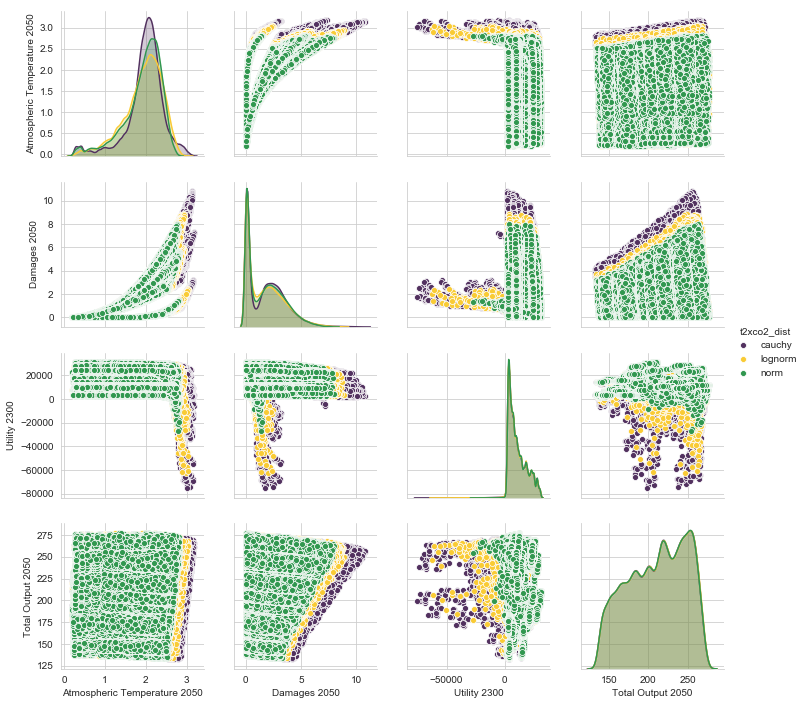

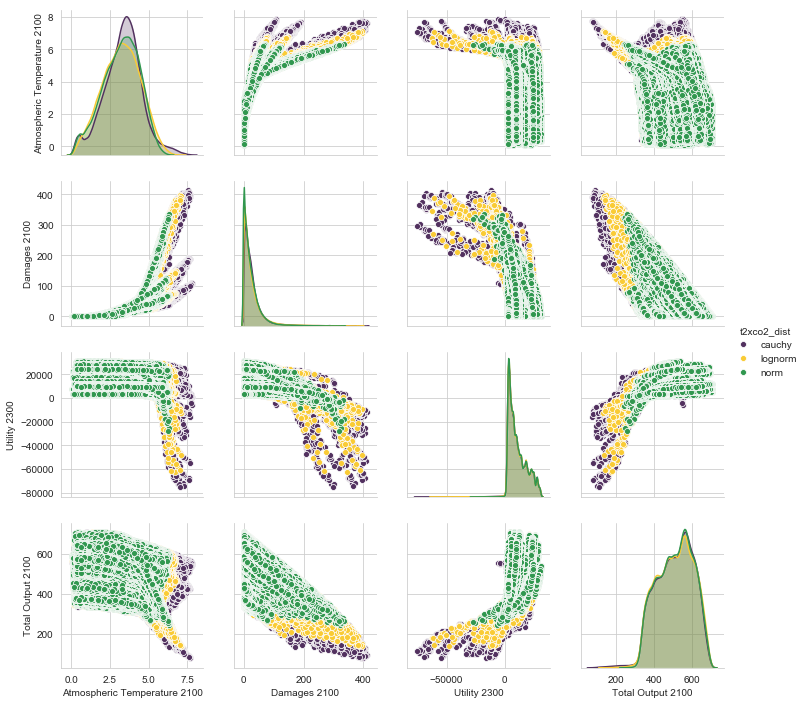

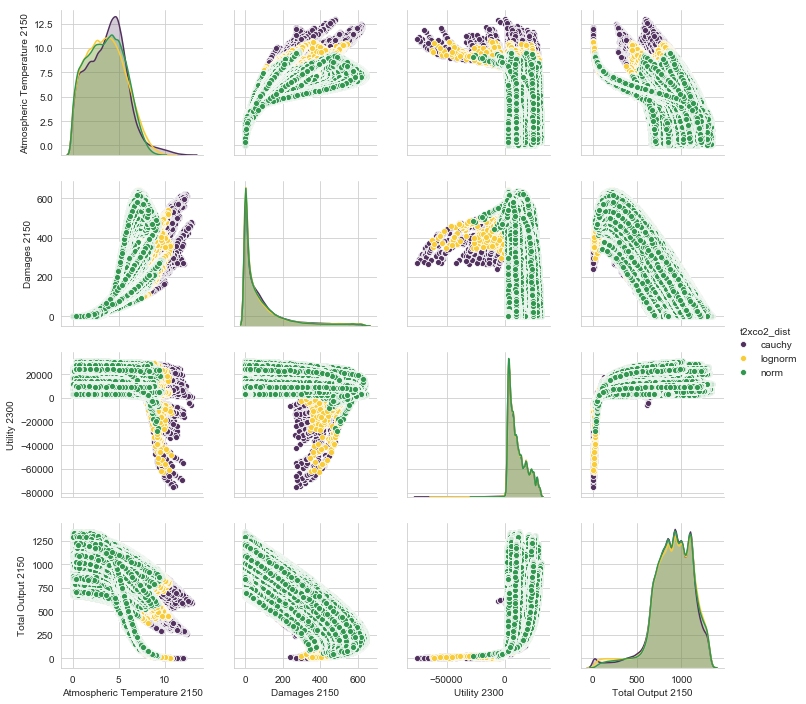

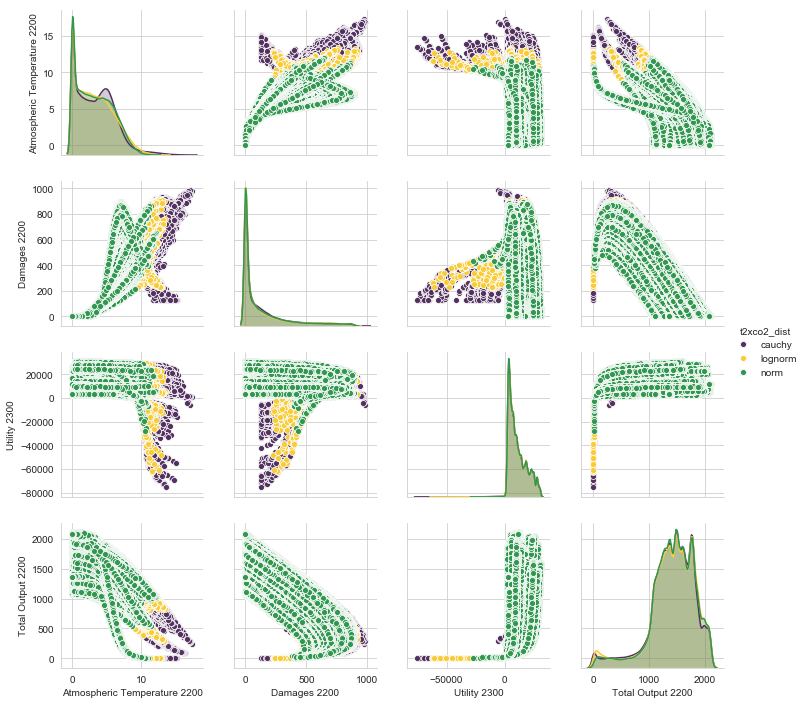

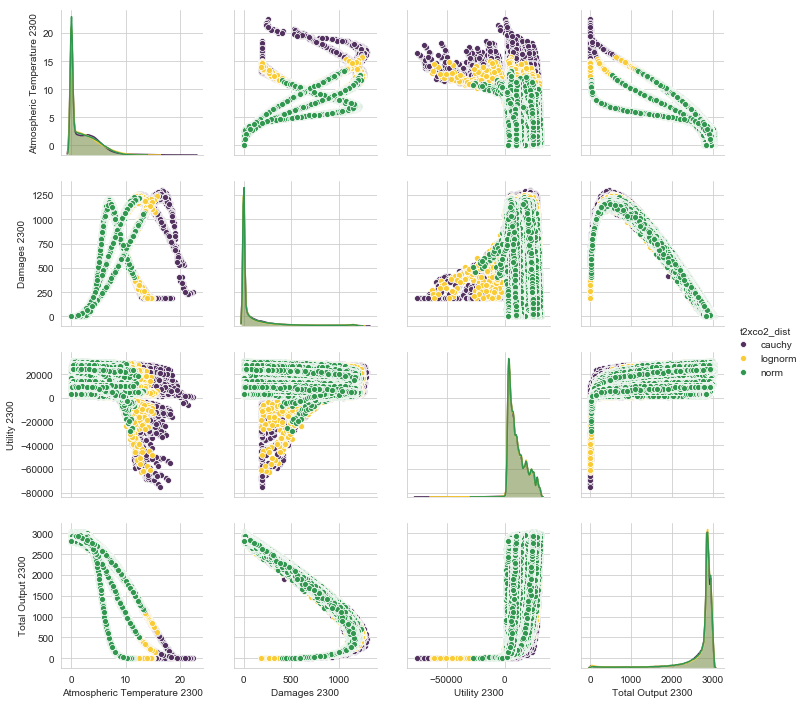

In [17]:
sns.set_style("whitegrid")
for _ in range(1,6):
    colmlst = list(range(0+_*4,4+_*4))
    namelist = colmlst[:]
    colmlst[2] = -3
    namelist[2] = -2
    ppDF = out_DF.iloc[:,colmlst+[-1]]
    sns_plot = sns.pairplot(ppDF, hue='t2xco2_dist', palette=clr_palette, vars=list(list(outcomes.keys())[i] for i in namelist))
    plt.show()
    sns_plot.savefig(dir_path + 'pairplot_'+str(list(outcomes.keys())[_*4][-4:])+'_dist'+'_V4.png')

#### Effect of damage function on the output

In [66]:
out_DF = pd.DataFrame(outcomes)
fdamage = experiments['fdamage']
out_DF['fdamage'] = fdamage # include damage column into the model output model

In [67]:
out_DF['fdamage'] = out_DF['fdamage'].apply(lambda x: 'Nordhaus - 2013' if x==0 else ('Newbold & Daigneault(Exp) - 2009' if x==1 else 'Weitzman - 2010'))

In [69]:
out_DF = out_DF.sort_values([out_DF.columns[-1]], ascending=False)

C:\Users\Shajee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


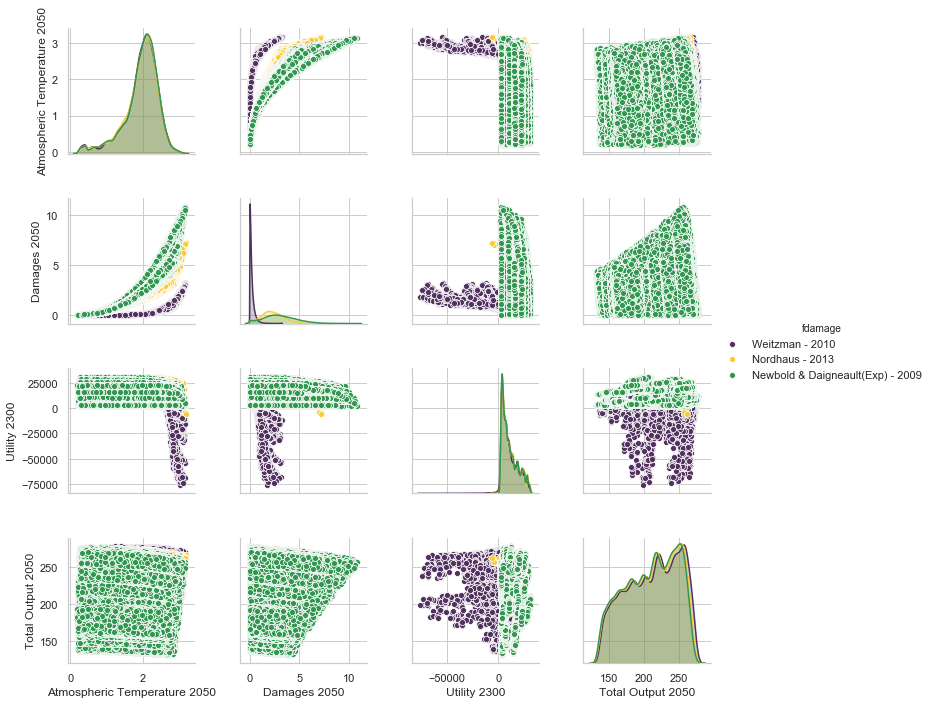

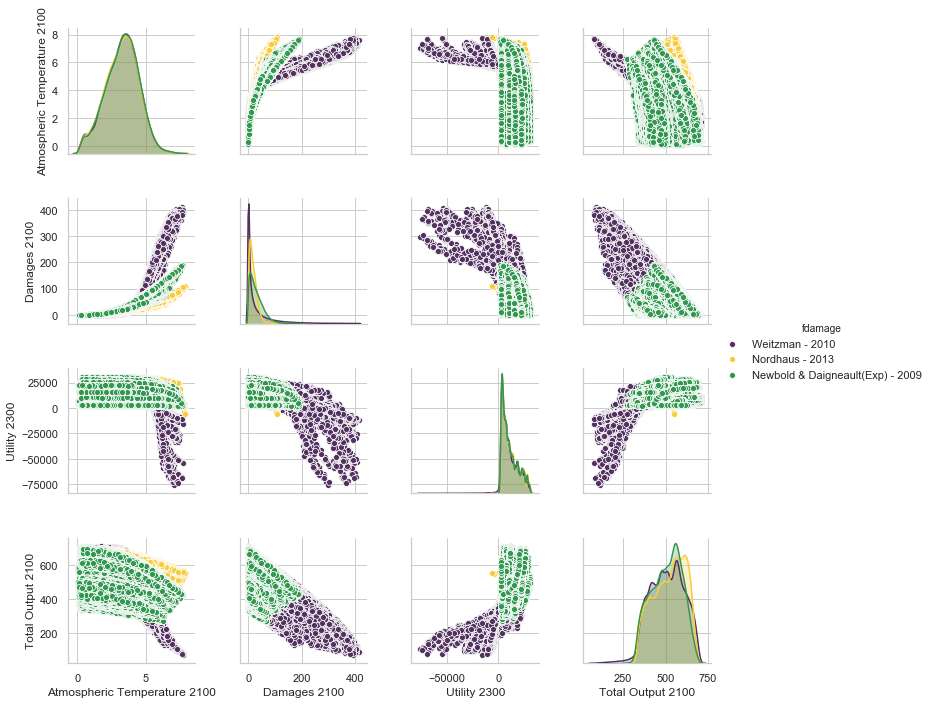

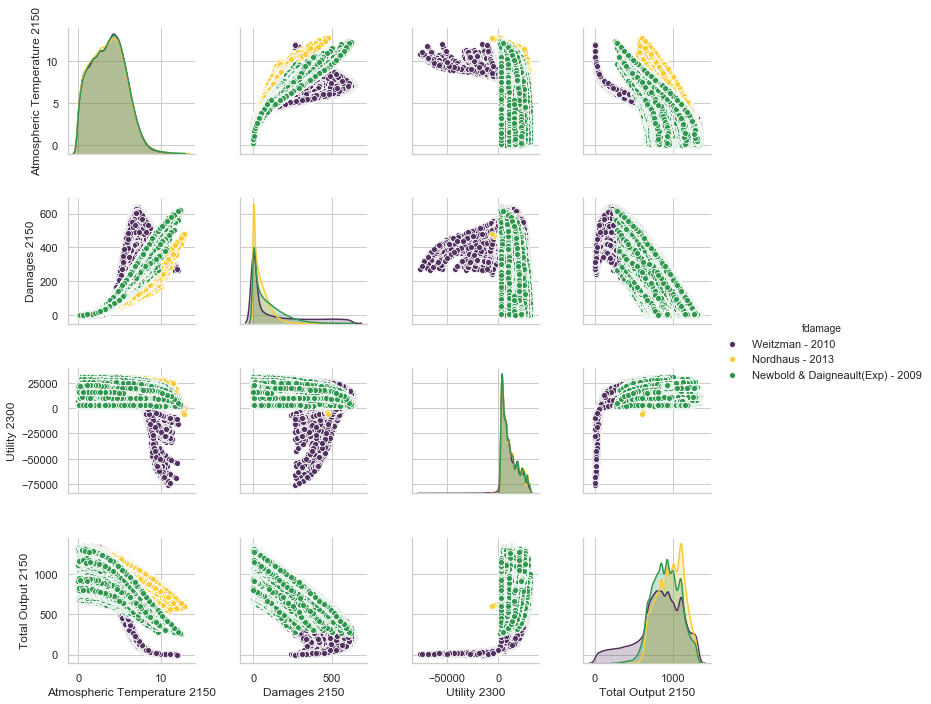

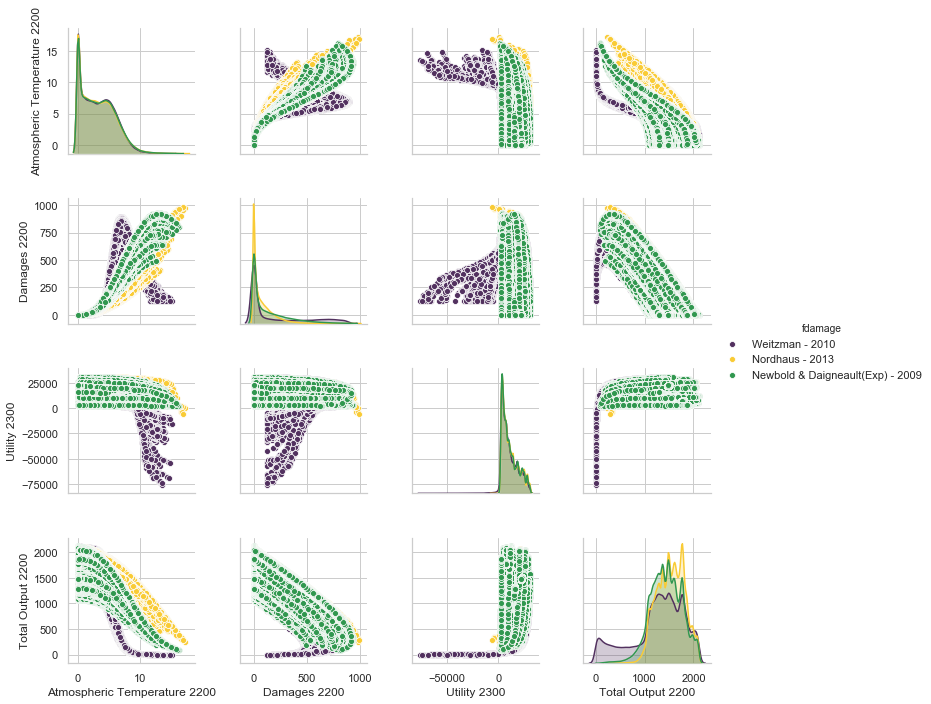

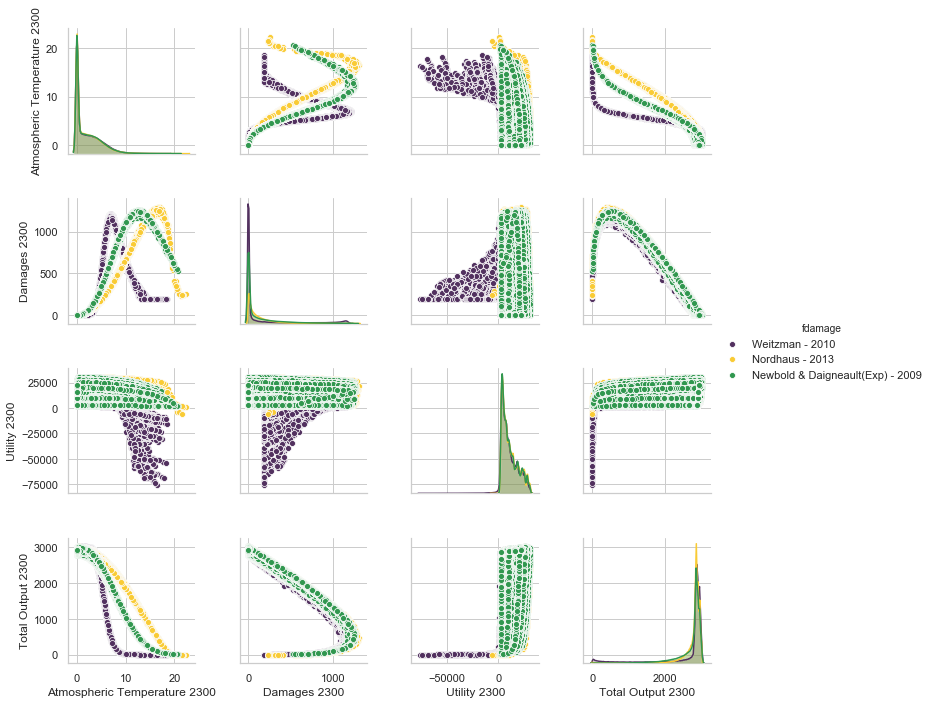

In [74]:
sns.set_style("whitegrid")
sns.set_context("notebook")
for _ in range(1,6):
    colmlst = list(range(0+_*4,4+_*4))
    namelist = colmlst[:]
    colmlst[2] = -3
    namelist[2] = -2
    ppDF = out_DF.iloc[:,colmlst+[-1]]
    sns_plot = sns.pairplot(ppDF, hue='fdamage', palette=clr_palette, vars=list(list(outcomes.keys())[i] for i in namelist))
    plt.show()
    sns_plot.savefig(dir_path + 'pairplot_damagefunc_'+str(list(outcomes.keys())[_*4][-4:]+'_V4.png'))

#### Effect of damage function in combination with ecs distributions

In [21]:
out_DF = pd.DataFrame(outcomes)
out_DF['fdamage'] = fdamage
out_DF['t2xco2_dist'] = t2xco2_dist
out_DF['t2xco2_dist'] = out_DF['t2xco2_dist'].apply(lambda x: 'norm' if x==0 else ('lognorm' if x==1 else 'cauchy'))
out_DF['fdamage'] = out_DF['fdamage'].apply(lambda x: ' + nordhaus' if x==0 else (' + newbold' if x==1 else ' + weitzman'))
out_DF['t2xco2_dist+fdamage'] = out_DF['t2xco2_dist'] + out_DF['fdamage']
out_DF = out_DF.drop(out_DF.columns[[-2, -3]], axis=1)

In [22]:
out_DF = out_DF.sort_values([out_DF.columns[-1]], ascending=1)

C:\Users\Shajee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


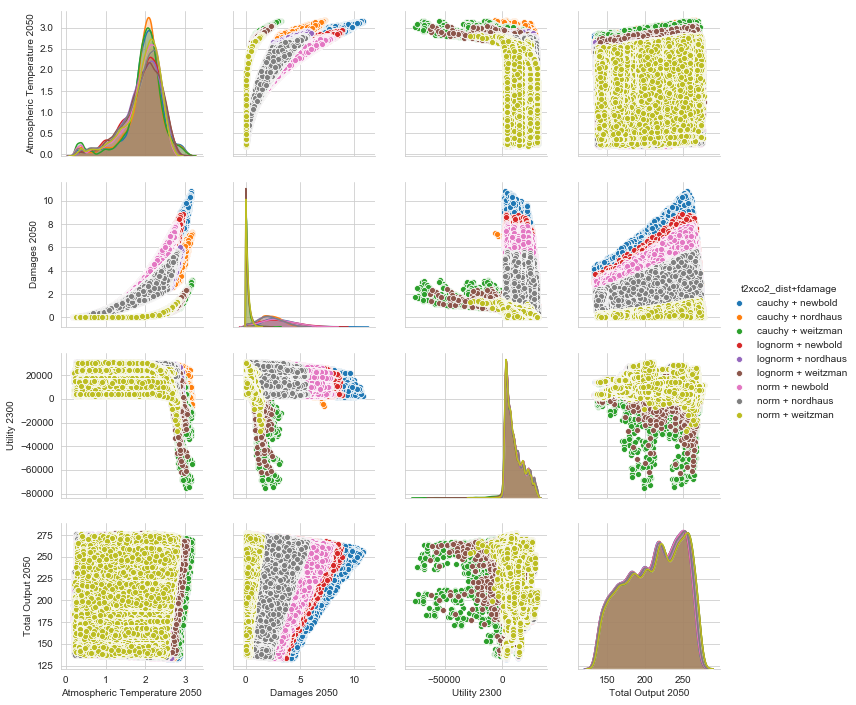

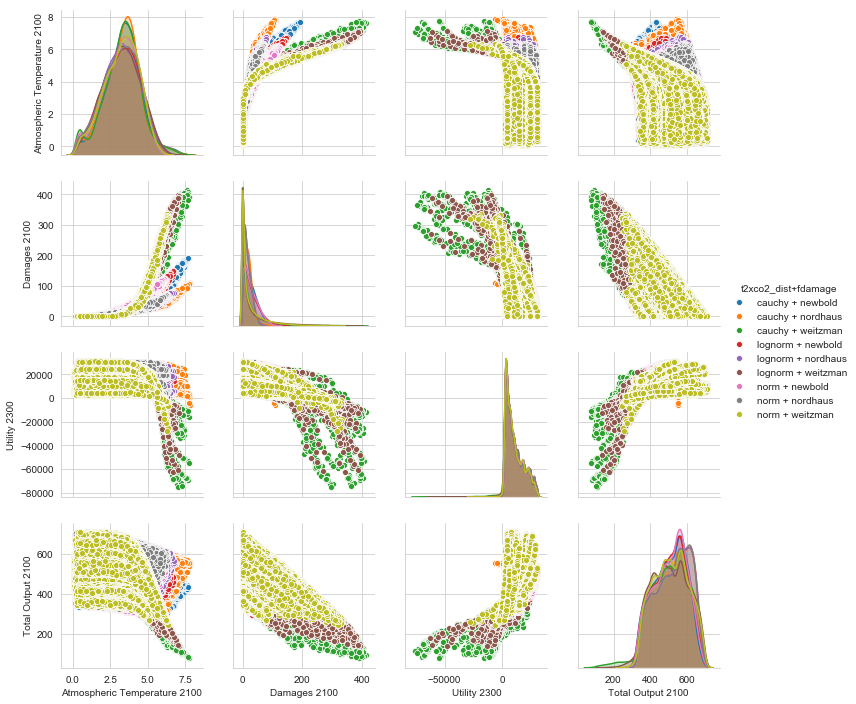

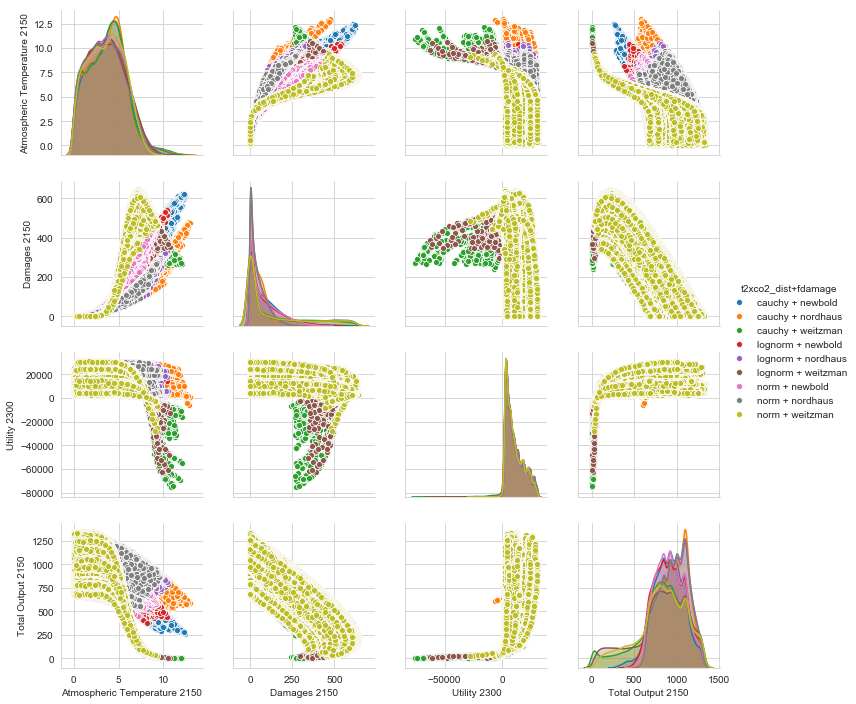

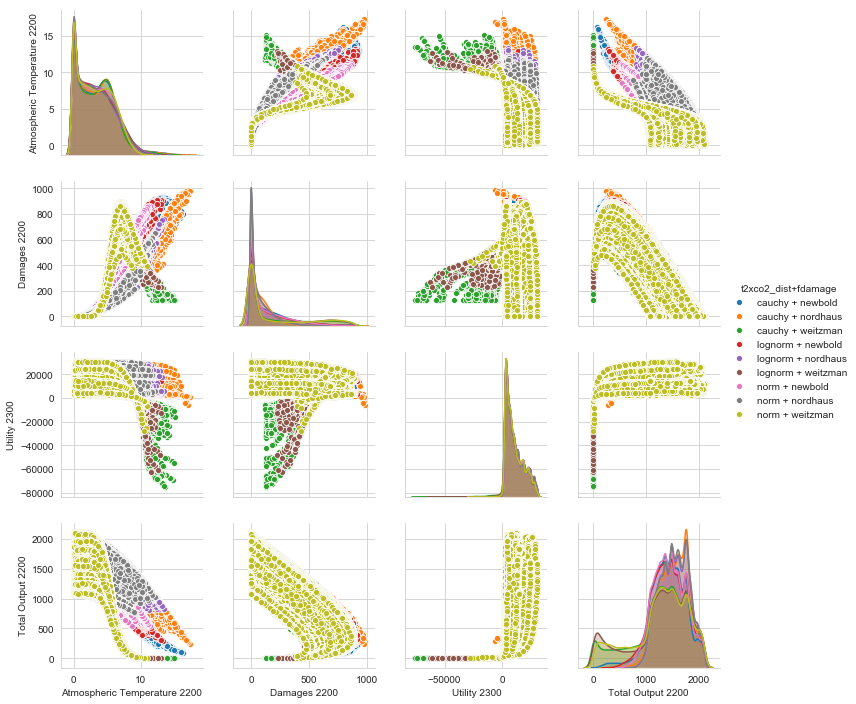

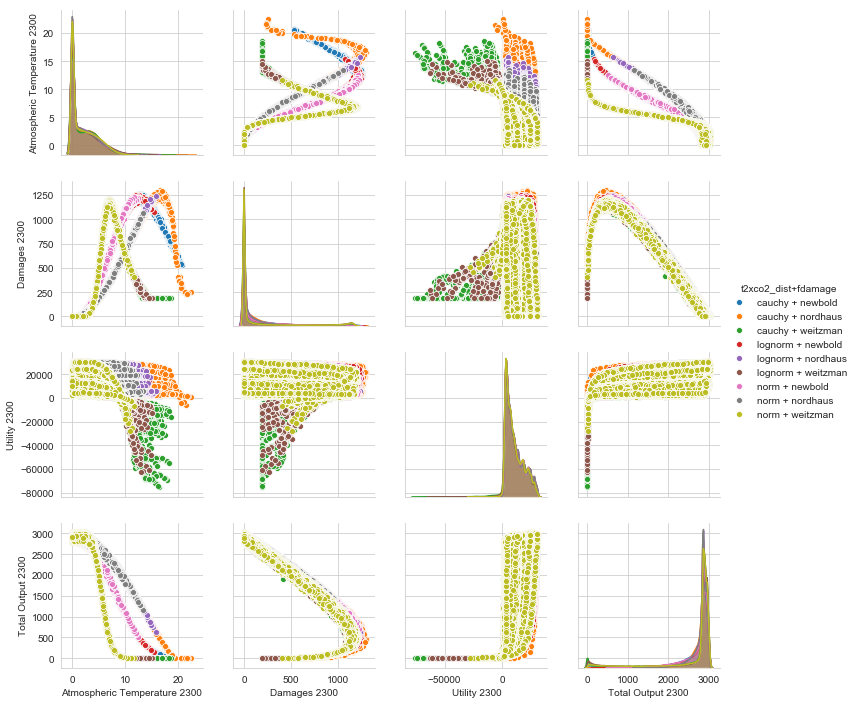

In [23]:
sns.set_style("whitegrid")
for _ in range(1,6):
    colmlst = list(range(0+_*4,4+_*4))
    namelist = colmlst[:]
    colmlst[2] = -3
    namelist[2] = -2
    ppDF = out_DF.iloc[:,colmlst+[-1]]
    sns_plot = sns.pairplot(ppDF, hue='t2xco2_dist+fdamage', vars=list(list(outcomes.keys())[i] for i in namelist))
    plt.show()
    sns_plot.savefig(dir_path + 'pairplot_damagefunc_'+str(list(outcomes.keys())[_*4][-4:]+'_t2xco2_dist+fdamage_'+'_V4.png'))

## Variance-Based Sensitivity Analysis (Sobol) over Uncertainties

In [6]:
dice_sm.uncertainties = [IntegerParameter('t2xco2_index', 0, 999),
                         IntegerParameter('t2xco2_dist',0,2),
                         IntegerParameter('fdamage',0,2),
                         RealParameter('tfp_gr',  0.07, 0.09),
                         RealParameter('sigma_gr', -0.012, -0.008),
                         RealParameter('pop_gr', 0.1, 0.15),
                         RealParameter('fosslim',  4000.0, 13649),
                         IntegerParameter('cback', 100, 600)]

dice_sm.levers = [RealParameter('sr', 0.1, 0.5),
                  RealParameter('irstp',  0.001, 0.015),
                  IntegerParameter('periodfullpart', 10, 58),
                  IntegerParameter('miu_period', 10, 58)]

dice_sm.outcomes = [ScalarOutcome('Atmospheric Temperature 2050', ScalarOutcome.MINIMIZE),
                    ScalarOutcome('Damages 2050', ScalarOutcome.MINIMIZE),
                    ScalarOutcome('Utility 2050', ScalarOutcome.MAXIMIZE),
                    ScalarOutcome('Total Output 2050', ScalarOutcome.MAXIMIZE),
                    ScalarOutcome('Atmospheric Temperature 2100', ScalarOutcome.MINIMIZE),
                    ScalarOutcome('Damages 2100', ScalarOutcome.MINIMIZE),
                    ScalarOutcome('Utility 2100', ScalarOutcome.MAXIMIZE),
                    ScalarOutcome('Total Output 2100', ScalarOutcome.MAXIMIZE),
                    ScalarOutcome('Atmospheric Temperature 2150', ScalarOutcome.MINIMIZE),
                    ScalarOutcome('Damages 2150', ScalarOutcome.MINIMIZE),
                    ScalarOutcome('Utility 2150', ScalarOutcome.MAXIMIZE),
                    ScalarOutcome('Total Output 2150', ScalarOutcome.MAXIMIZE),
                    ScalarOutcome('Atmospheric Temperature 2200', ScalarOutcome.MINIMIZE),
                    ScalarOutcome('Damages 2200', ScalarOutcome.MINIMIZE),
                    ScalarOutcome('Utility 2200', ScalarOutcome.MAXIMIZE),
                    ScalarOutcome('Total Output 2200', ScalarOutcome.MAXIMIZE),
                    ScalarOutcome('Atmospheric Temperature 2300', ScalarOutcome.MINIMIZE),
                    ScalarOutcome('Damages 2300', ScalarOutcome.MINIMIZE),
                    ScalarOutcome('Utility 2300', ScalarOutcome.MAXIMIZE),
                    ScalarOutcome('Total Output 2300', ScalarOutcome.MAXIMIZE)]

In [7]:
sobol_problem = problem = get_SALib_problem(dice_sm.uncertainties)

In [8]:
n_scenarios = 10000

In [9]:
# start = time.time()
# with MultiprocessingEvaluator(dice_sm) as evaluator:
#     sa_results = evaluator.perform_experiments(scenarios = 10000, uncertainty_sampling = SOBOL)
# end = time.time()
# print('Sobol time is ' + str(round((end - start)/60)) + ' mintues')

In [10]:
from ema_workbench import save_results, load_results

file_name = 'open_exploration_SA_V4_' + str(n_scenarios)+'scen.tar.gz'
# save_results(sa_results, file_name)

sa_results = load_results(file_name)

[MainProcess/INFO] results loaded succesfully from C:\Users\Shajee\Documents\GitHub\PyDICE\2_Open_Exploration\open_exploration_SA_V4_10000scen.tar.gz


In [11]:
experiments, outcomes = sa_results

In [12]:
outcomes = dict(itertools.islice(outcomes.items(), 4, len(outcomes))) # slicing away the 2010 values

In [13]:
outcomes_key = list(outcomes.keys())

In [14]:
scores = []
for i in range(0, len(outcomes_key)) : 
    scores.append(sobol.analyze(problem, outcomes[outcomes_key[i]], print_to_console = False))

In [12]:
columns = pd.MultiIndex.from_product([[outcomes_key[0]], ["ST","ST_conf","S1","S1_conf"]])

In [13]:
len(scores)

20

In [14]:
indicesDF = pd.DataFrame()
for i in range (4):
    for j in range (5):
        scores_filtered = {k:scores[4*j+i][k] for k in ["ST","ST_conf","S1","S1_conf"]}
        Si_df = pd.DataFrame(scores_filtered, index = problem["names"])
        indices = Si_df[['S1','ST']]
        indices.columns = pd.MultiIndex.from_product([[outcomes_key[i][:-5]],[outcomes_key[4*j+i][-4:]],indices.columns])
        indices.columns.names = ["Outcome of Interest", "Year", 'Sobol Coefficient']
        indicesDF = (indicesDF.T.append(indices.T)).T

In [15]:
indicesDF.index = ["Price of Backstop Technology", "Damage Function", "Total Availability of Fossil Fuel", 
                "Population Growth Rate", "Initial Growth Rate of Carbon Intenstity", 
                "ECS Distribution", "ECS Sampled Value", "TFP Growth Rate"]

In [16]:
indicesDF_wo_index = indicesDF.copy()

In [17]:
indicesDF_wo_index = indicesDF_wo_index.drop(["ECS Sampled Value"])

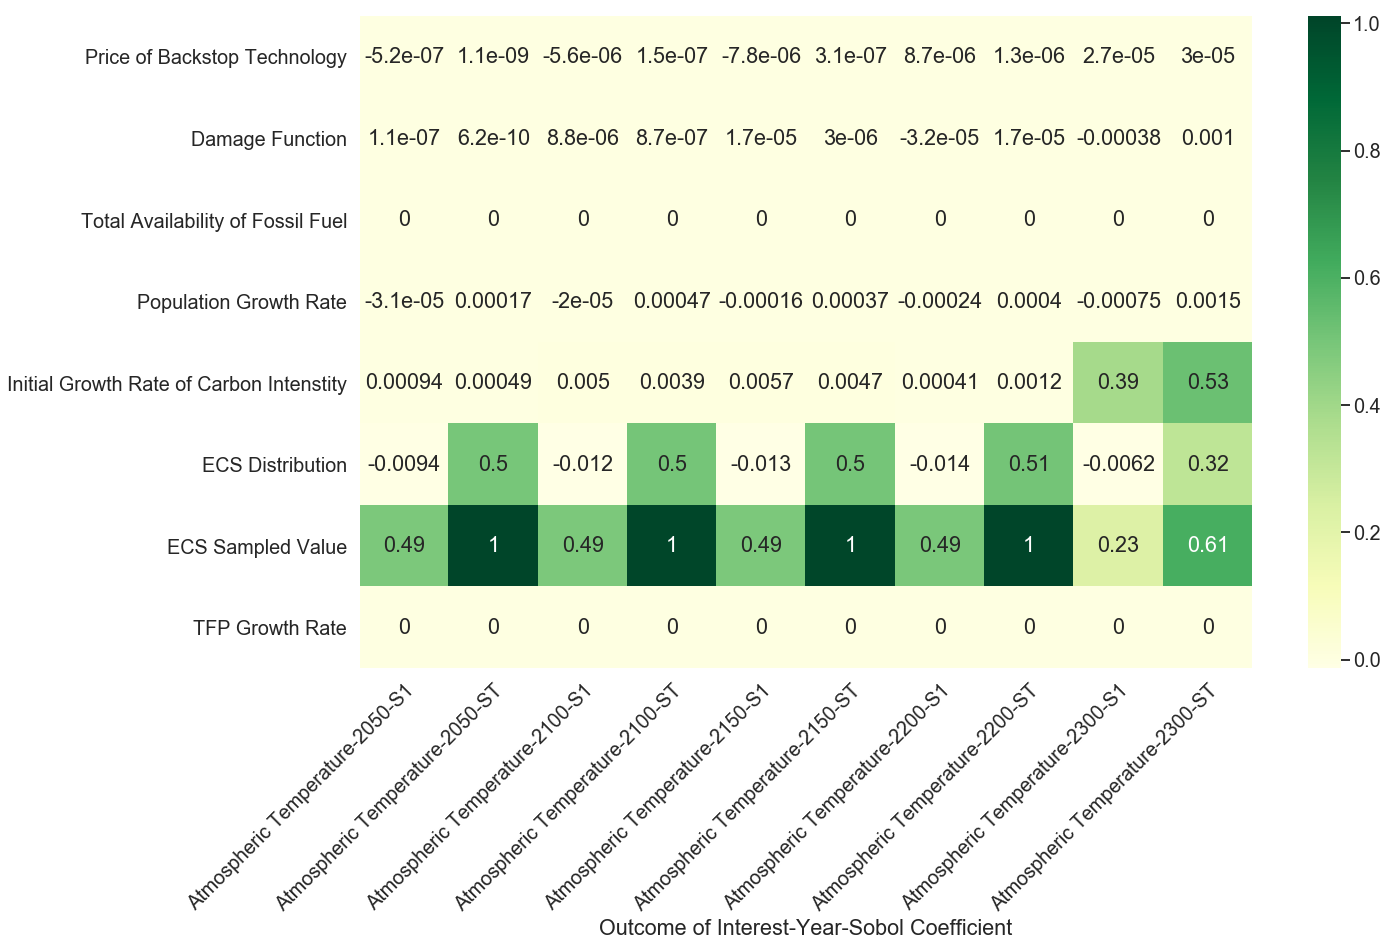

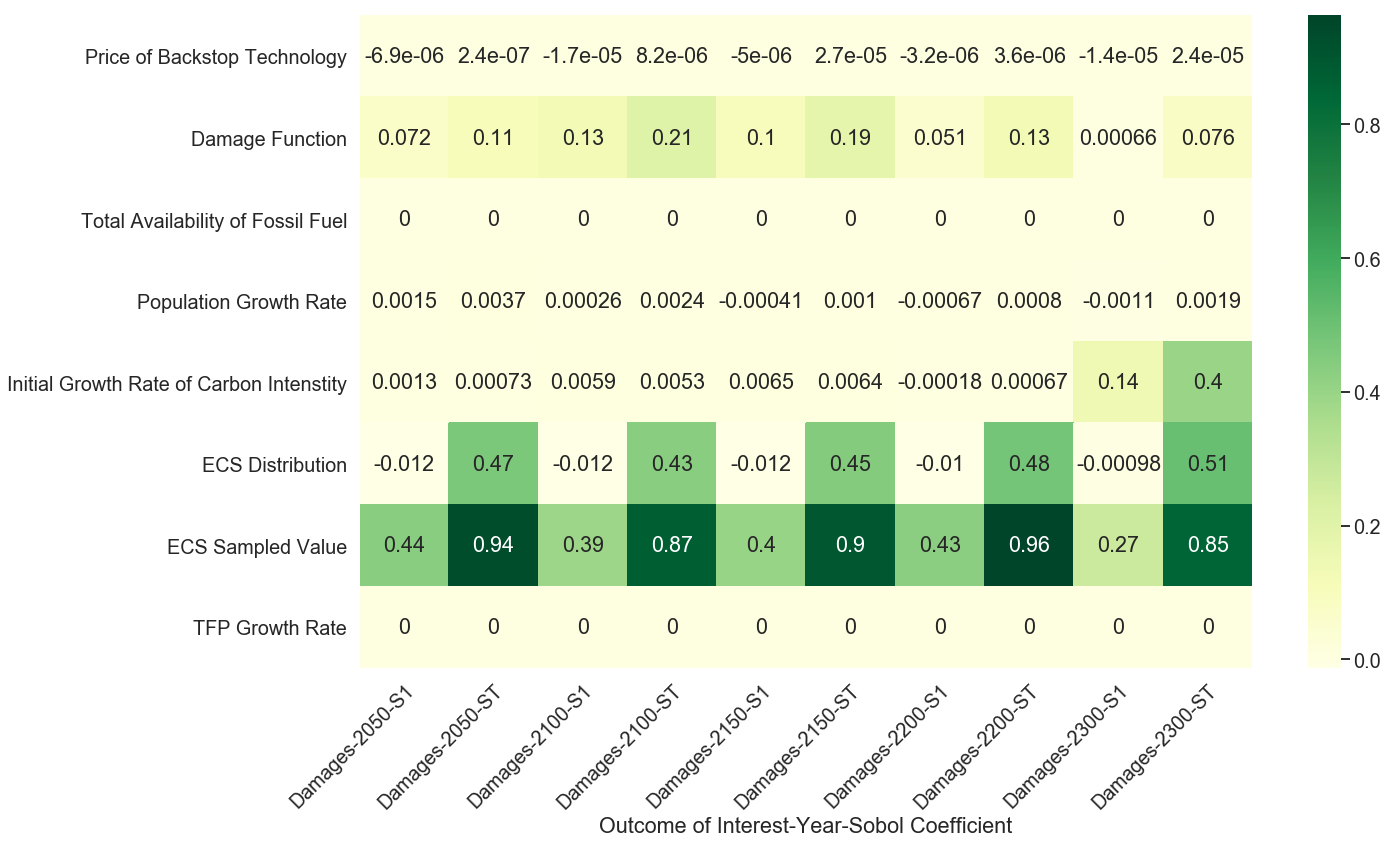

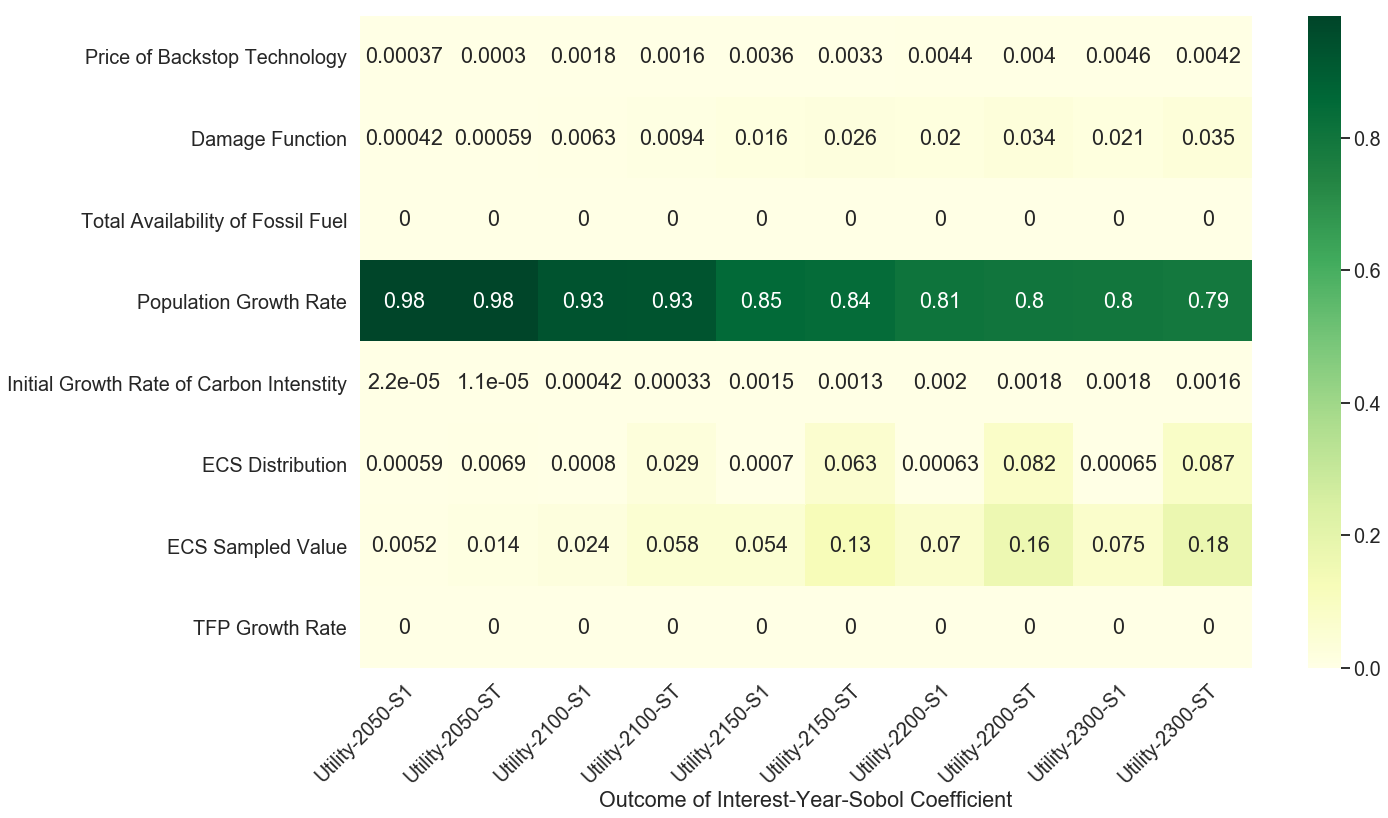

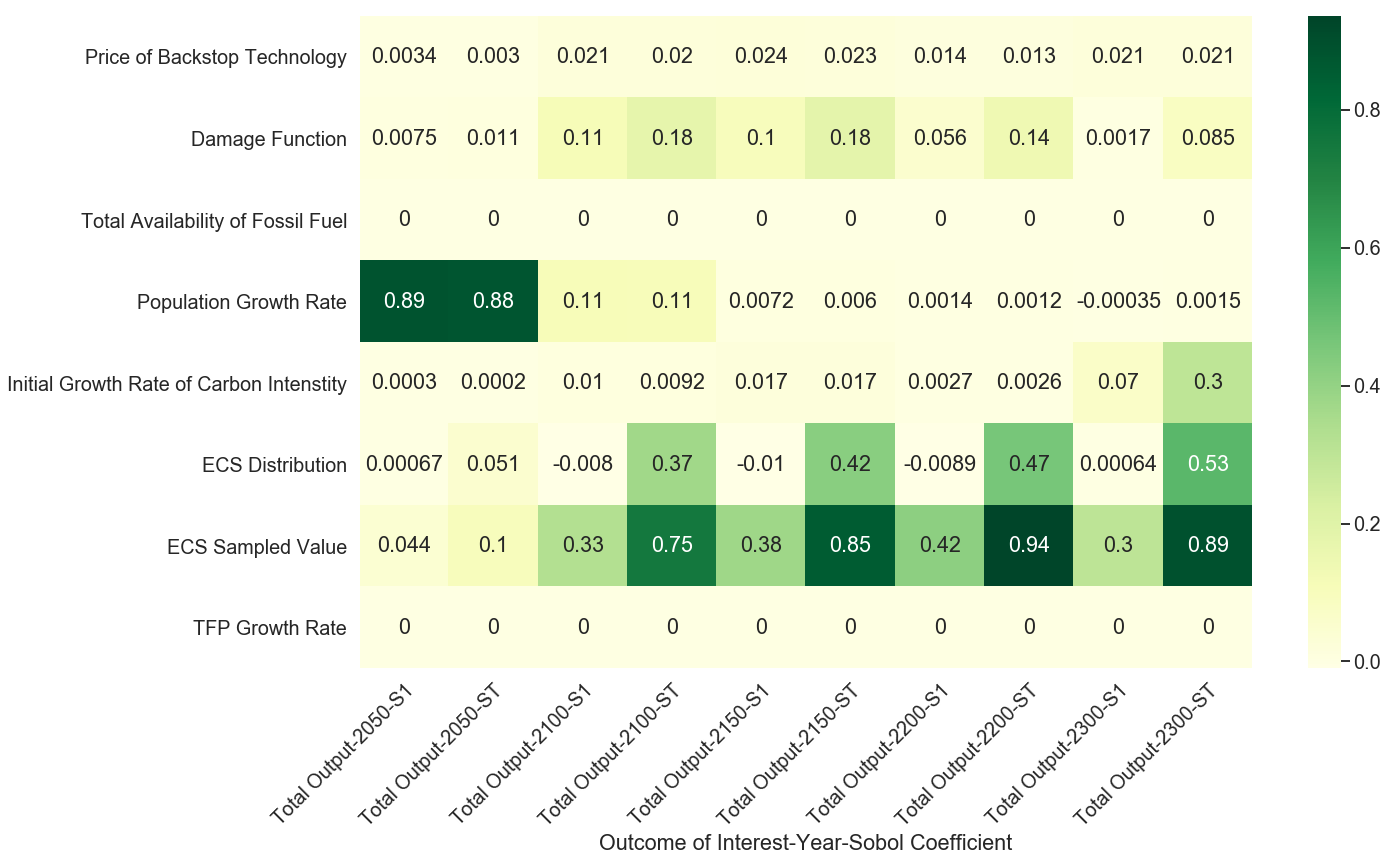

In [18]:
sns.set(context = "talk", font_scale = 1.2)
for i in range(4):
    plt.figure(figsize=(20,12))
    fig = sns.heatmap(indicesDF.iloc[:,10*i:10*i+10], annot=True, cmap="YlGn")
    fig.set_xticklabels(fig.get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right')
    fig.set_ylabel("")
    plt.savefig('Sobol_Heatmap_' + outcomes_key[i][:-5] + '_scen' + str(10) 
                + 'k' + '_V4.png', bbox_inches='tight')

In [19]:
# for i in range(4):
#     plt.figure(figsize=(20,12))
#     sns.set_context("talk")
#     fig = sns.heatmap(indicesDF_wo_index.iloc[:,10*i:10*i+10], annot=True, cmap="YlGn")
#     fig.set_xticklabels(fig.get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right')
#     plt.savefig('Sobol_Heatmap_wo_index_' + outcomes_key[i][:-5] + '_scen' + str(10) 
#                 + 'k' + '.png', bbox_inches='tight')

In [15]:
from plotting_sobol import (plot_sobol_indices, plot_scores)
sns.set_palette([sns.color_palette("inferno", 15)[-3],sns.color_palette("YlGn", 10)[-4], 
                        sns.color_palette("viridis", 10)[3],sns.cubehelix_palette(10)[5]])

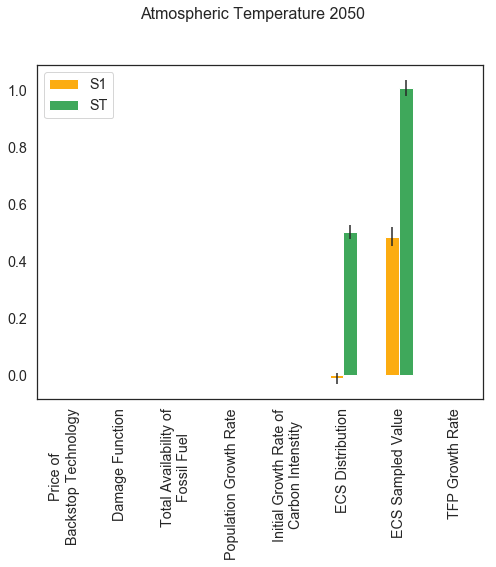

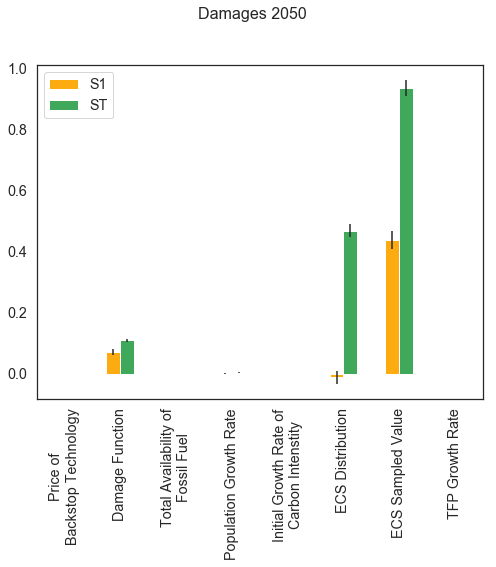

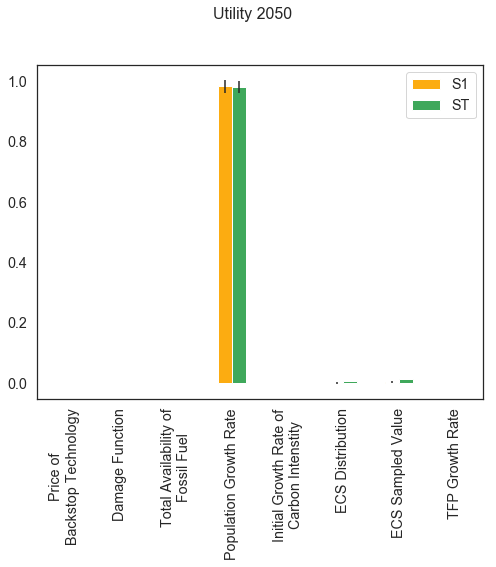

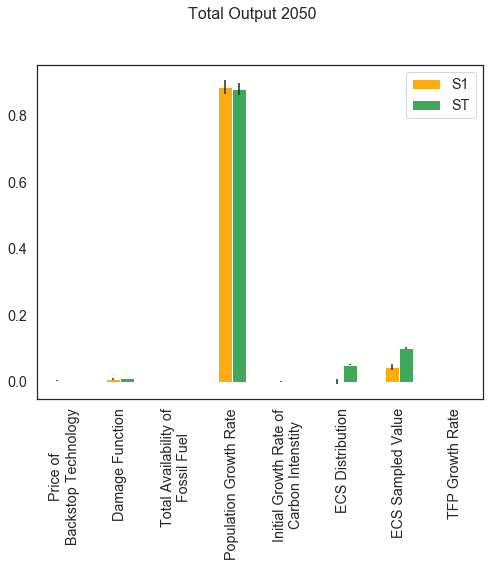

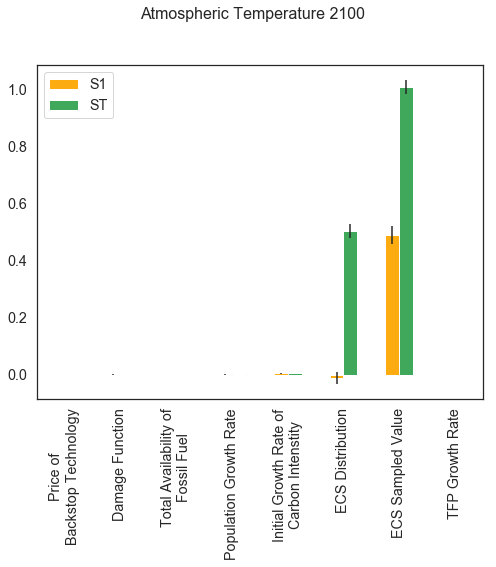

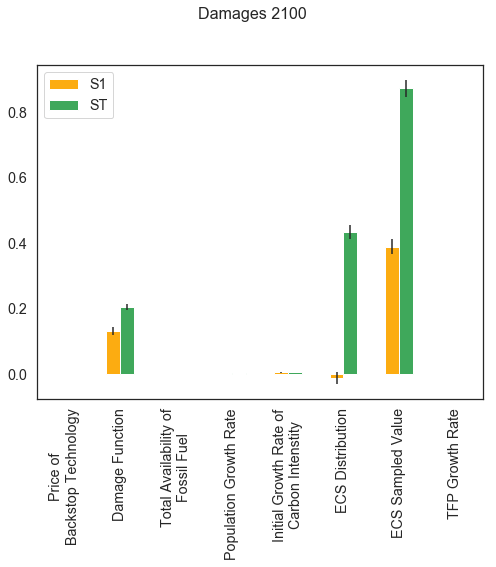

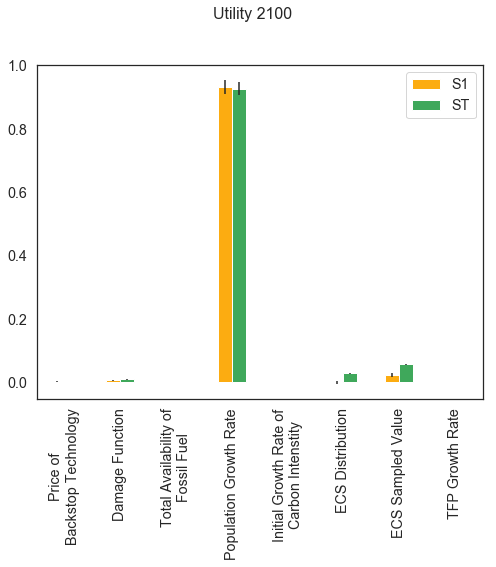

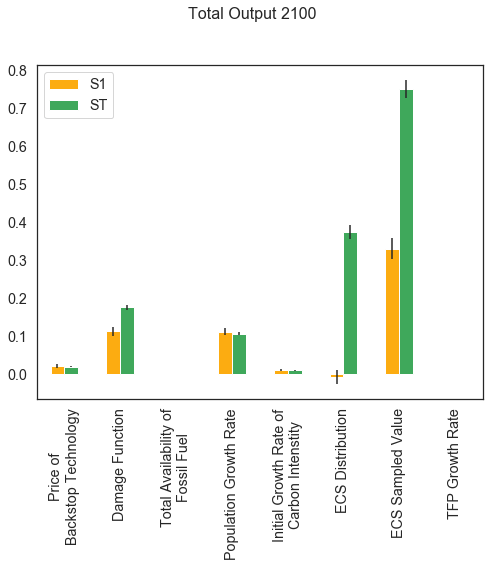

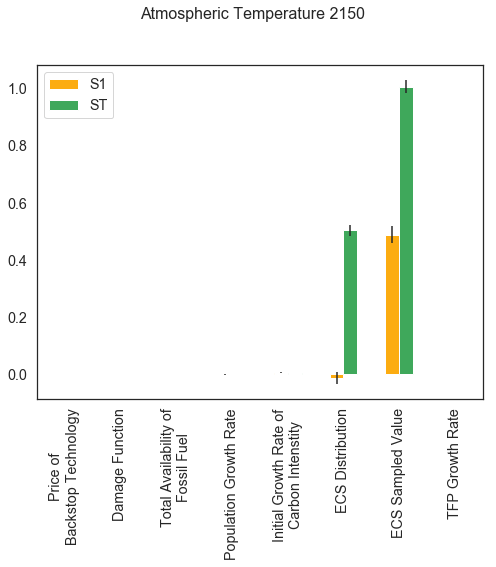

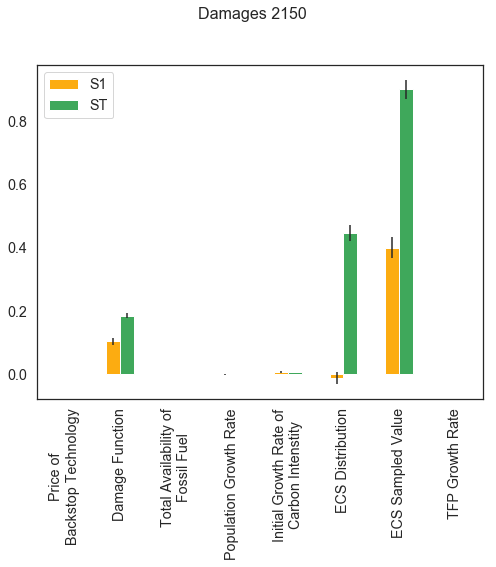

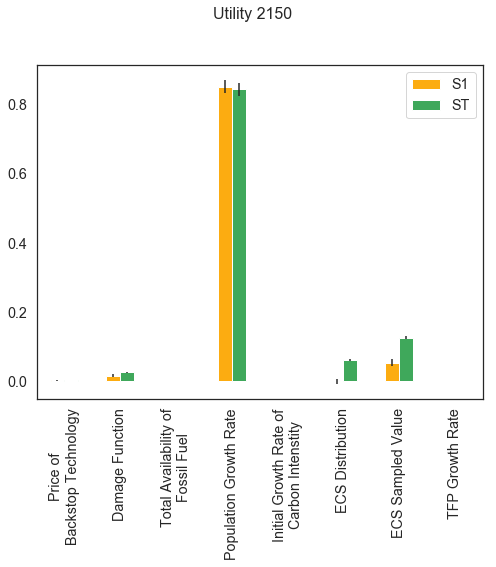

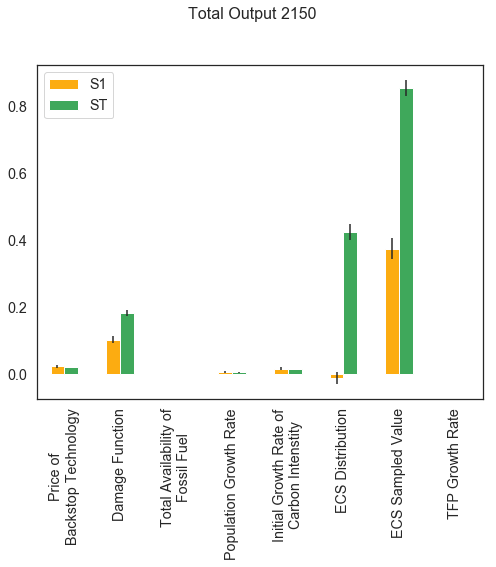

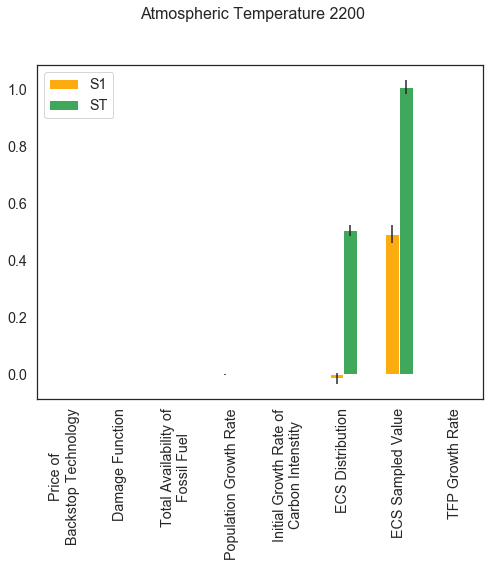

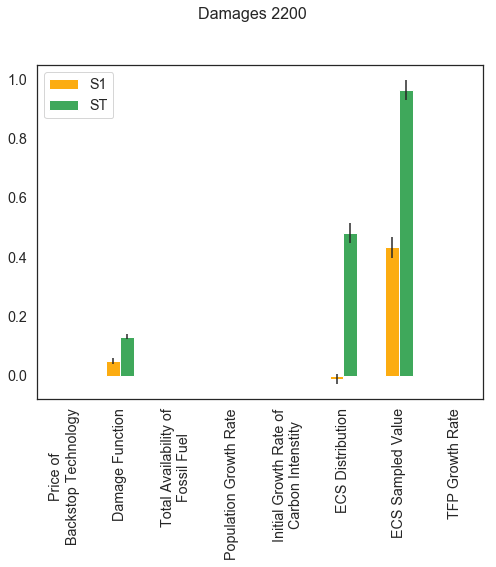

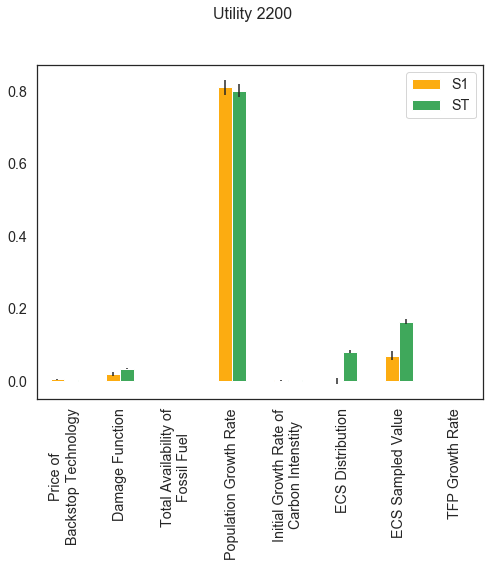

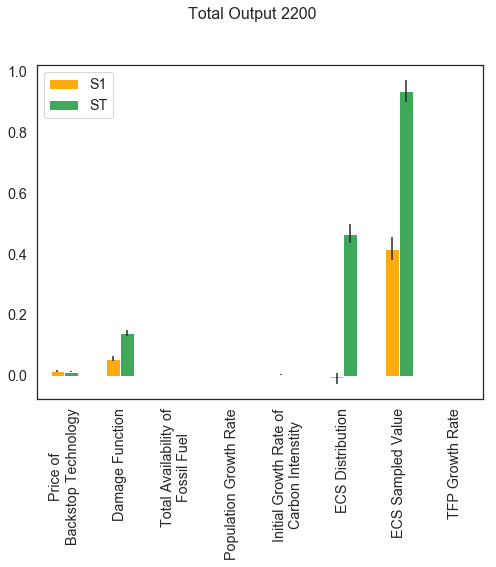

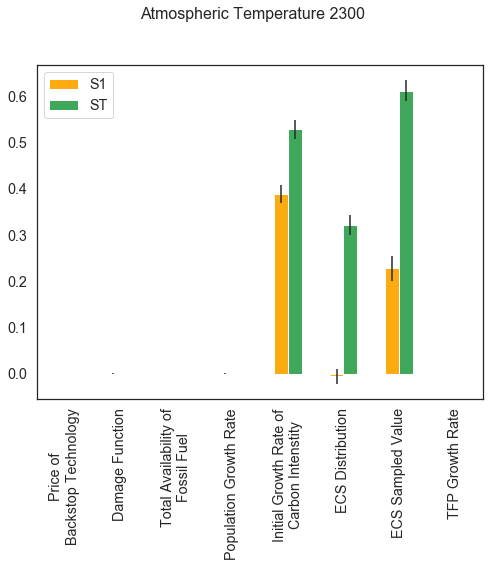

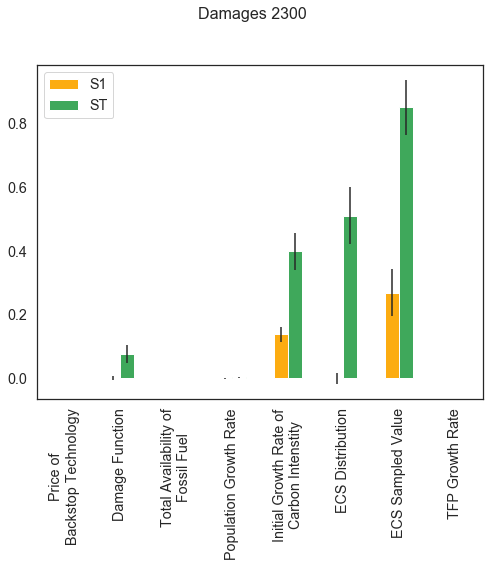

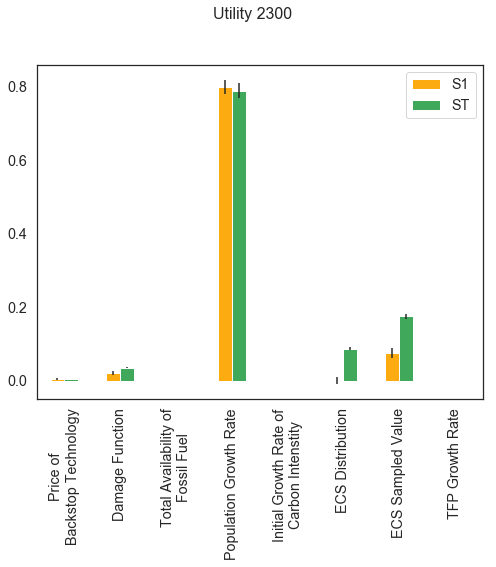

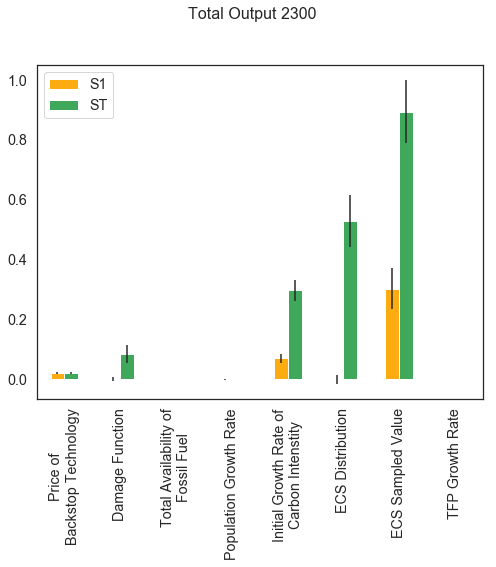

In [19]:
sns.set(font_scale = 1.3)
fig = plot_scores(scores[0], problem, outcomes_key[0])
outcomes_key_name = outcomes_key[0].replace(" ", "_")
fig.savefig('sobol_'+str(outcomes_key_name)+'_V4.png', dpi=fig.dpi)
for i in range(1, len(outcomes_key)): 
    figi = plot_scores(scores[i], problem, outcomes_key[i])
    figi.axes.append(fig)
    outcomes_key_name = outcomes_key[i].replace(" ", "_")
    figi.savefig('sobol_'+str(outcomes_key_name)+'_V4.png', dpi=fig.dpi)
plt.show()

In [22]:
# import seaborn as sns

# def plot_scores(scores):
#     scores_filtered = {k:scores[k] for k in ['ST','ST_conf','S1','S1_conf']}
#     Si_df = pd.DataFrame(scores_filtered, index=problem['names'])

#     sns.set_style('white')
#     fig, ax = plt.subplots(1)

#     indices = Si_df[['S1','ST']]
#     err = Si_df[['S1_conf','ST_conf']]

#     indices.plot.bar(yerr=err.values.T,ax=ax)
#     fig.set_size_inches(8,6)
#     fig.subplots_adjust(bottom=0.3)
#     return fig

# plot_scores(scores)
# plt.show()

## Variance-Based Sensitivity Analysis (Sobol) over Levers

In [23]:
sobol_problem = problem = get_SALib_problem(dice_sm.levers)

In [24]:
start = time.time()
with MultiprocessingEvaluator(dice_sm) as evaluator:
    sa_results = evaluator.perform_experiments(policies = 10000, levers_sampling = SOBOL)
end = time.time()
print('Sobol time is ' + str(round((end - start)/60)) + ' mintues')

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1 scenarios * 100000 policies * 1 model(s) = 100000 experiments
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] 20000 cases completed
[MainProcess/INFO] 30000 cases completed
[MainProcess/INFO] 40000 cases completed
[MainProcess/INFO] 50000 cases completed
[MainProcess/INFO] 60000 cases completed
[MainProcess/INFO] 70000 cases completed
[MainProcess/INFO] 80000 cases completed
[MainProcess/INFO] 90000 cases completed
[MainProcess/INFO] 100000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


Sobol time is 3 mintues


In [25]:
experiments, outcomes = sa_results

In [26]:
outcomes = dict(itertools.islice(outcomes.items(), 4, len(outcomes))) # slicing away the 2010 values

In [27]:
outcomes_key = list(outcomes.keys())

In [28]:
scores = []
for i in range(0, len(outcomes_key)) : 
    scores.append(sobol.analyze(problem, outcomes[outcomes_key[i]], print_to_console = False))

In [29]:
columns = pd.MultiIndex.from_product([[outcomes_key[0]], ["ST","ST_conf","S1","S1_conf"]])

In [30]:
indicesDF = pd.DataFrame()
for i in range (4):
    for j in range (5):
        scores_filtered = {k:scores[4*j+i][k] for k in ["ST","ST_conf","S1","S1_conf"]}
        Si_df = pd.DataFrame(scores_filtered, index = problem["names"])
        indices = Si_df[['S1','ST']]
        indices.columns = pd.MultiIndex.from_product([[outcomes_key[i][:-5]],[outcomes_key[4*j+i][-4:]],indices.columns])
        indices.columns.names = ["Outcome of Interest", "Year", 'Sobol Coefficient']
        indicesDF = (indicesDF.T.append(indices.T)).T

In [31]:
indicesDF.index = ["Pure rate of social time preference", "Emission Control Rate Target", 
                   "Full Participation Target", "Savings Rate"]

In [35]:
indicesDF_wo_fptargetDF = indicesDF.copy()

In [36]:
indicesDF_wo_fptargetDF = indicesDF_wo_fptargetDF.drop(["Full Participation Target"])

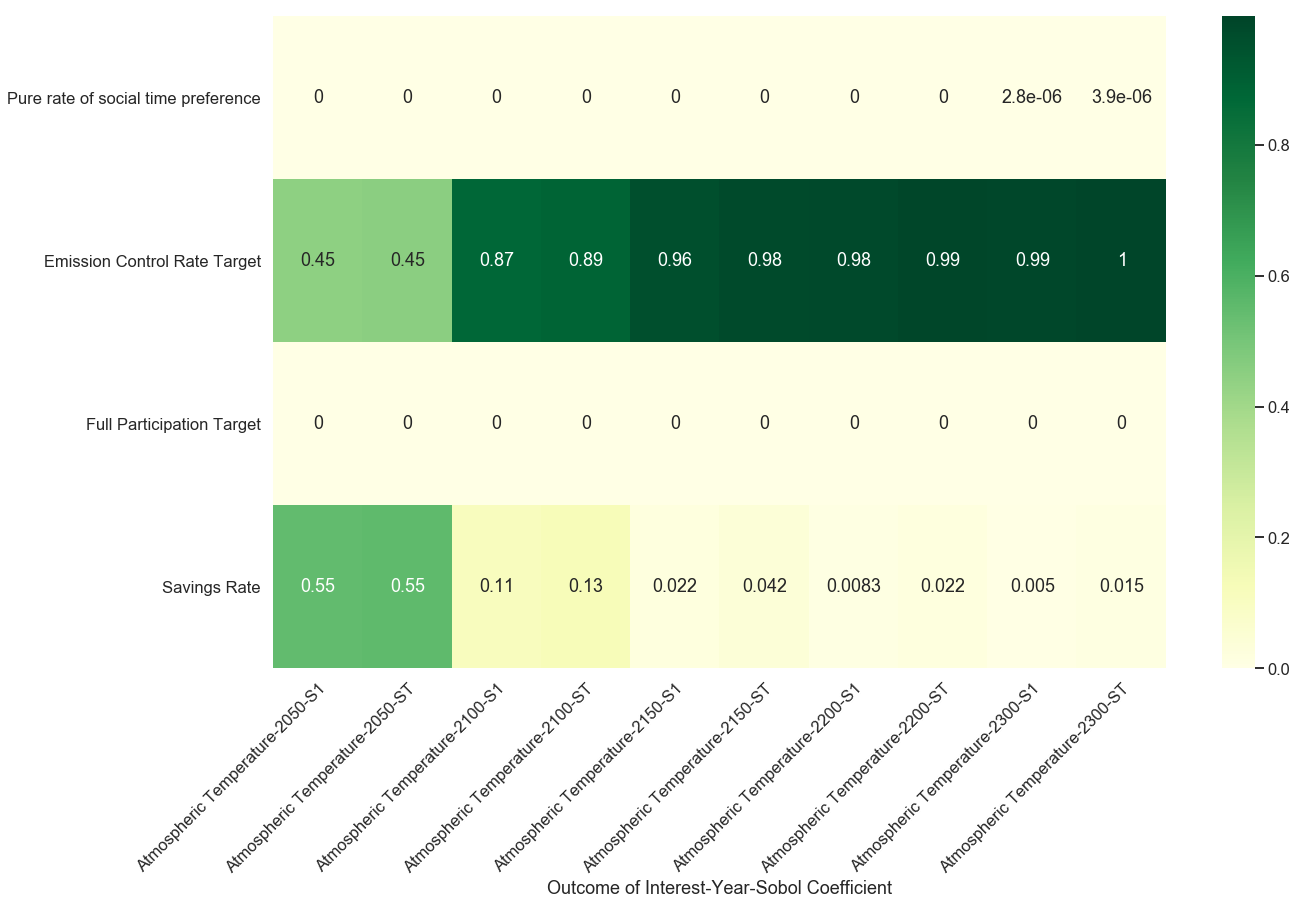

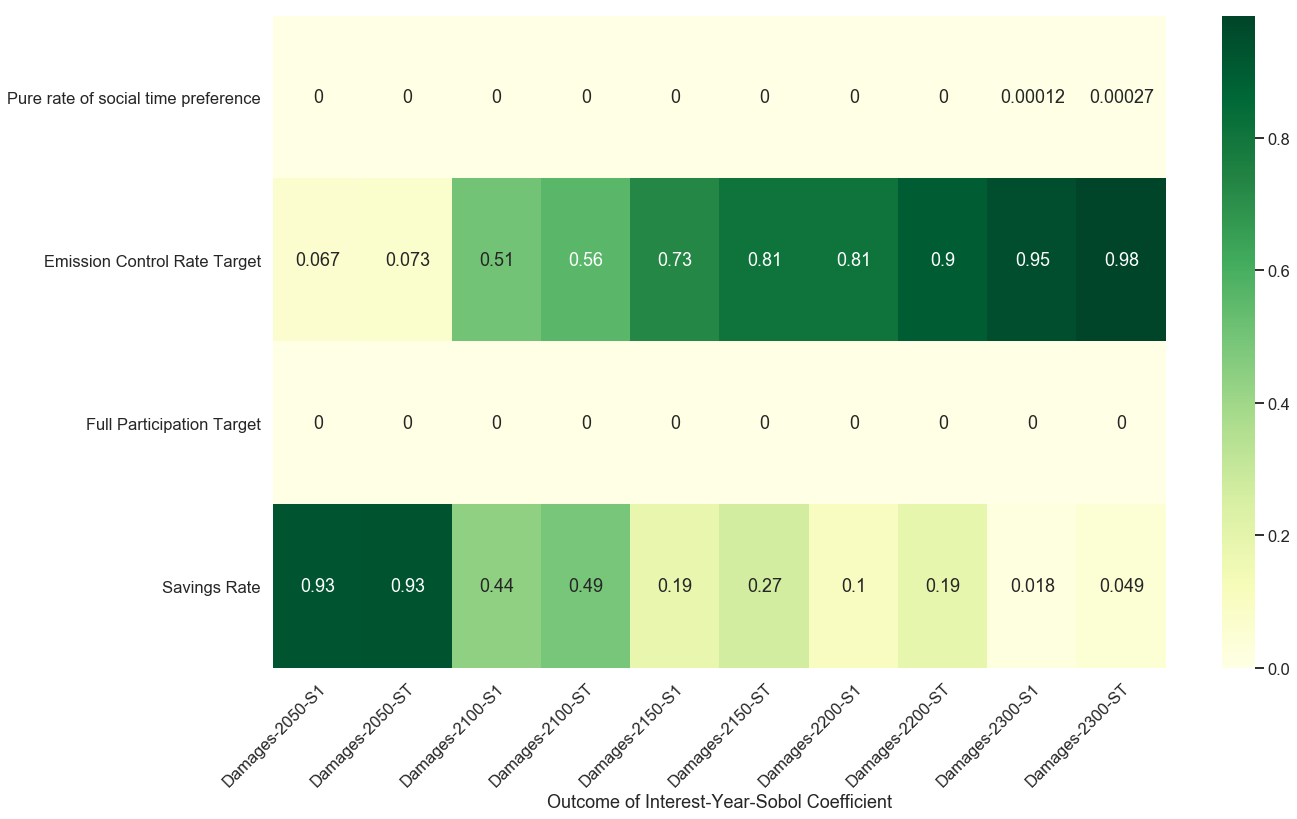

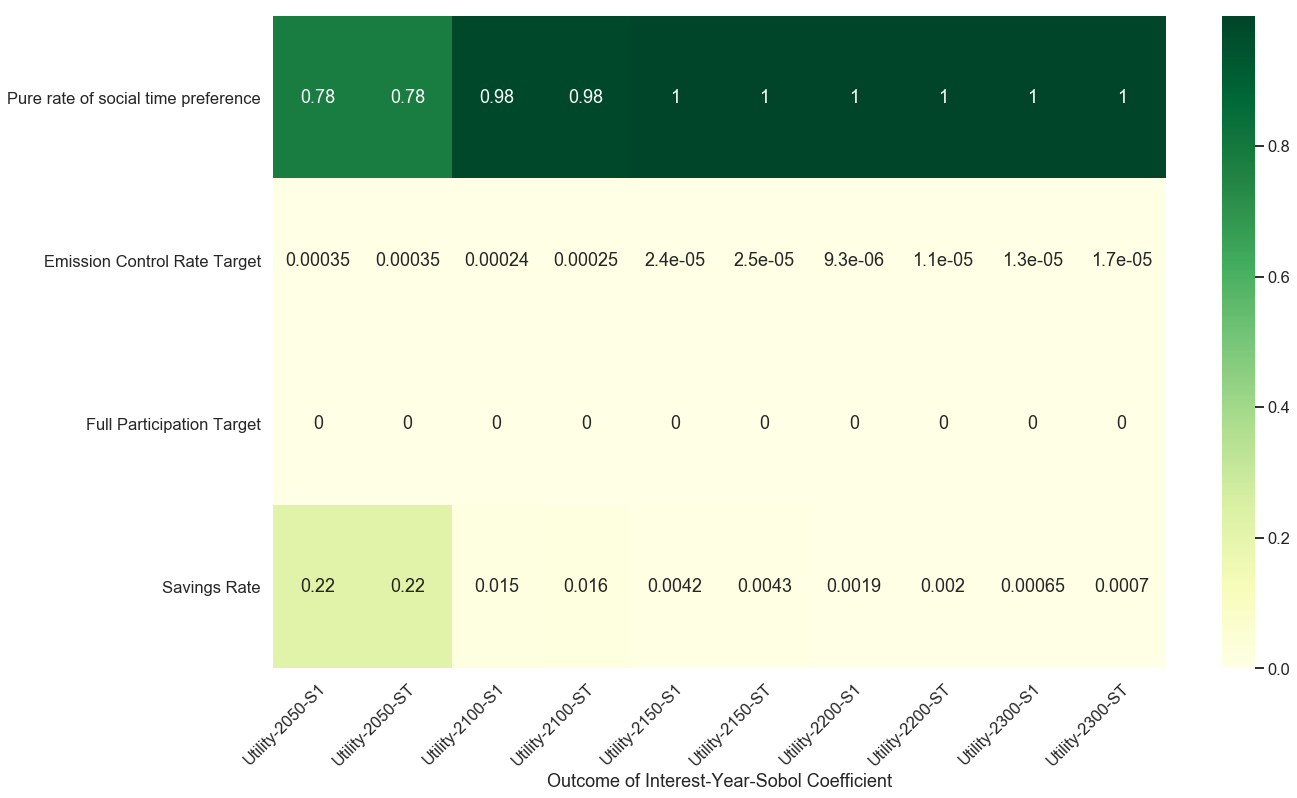

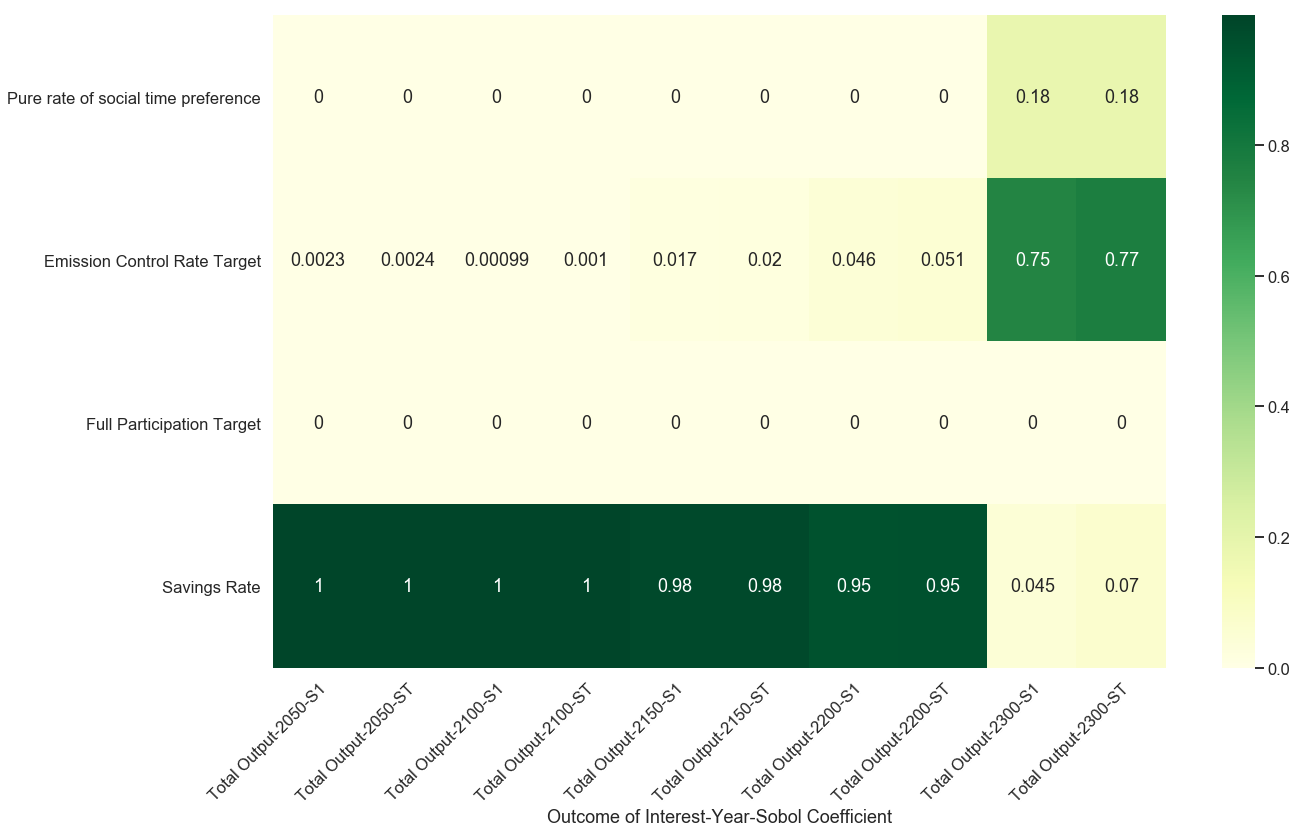

In [37]:
sns.set(context = "talk", font_scale = 1.2)
for i in range(4):
    plt.figure(figsize=(20,12))
    sns.set_context("talk")
    fig = sns.heatmap(indicesDF.iloc[:,10*i:10*i+10], annot=True, cmap="YlGn")
    fig.set_xticklabels(fig.get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right')
    plt.savefig('Sobol_Heatmap_Levers' + outcomes_key[i][:-5] + '_scen' + str(10) 
                + 'k' + '_V4.png', bbox_inches='tight')

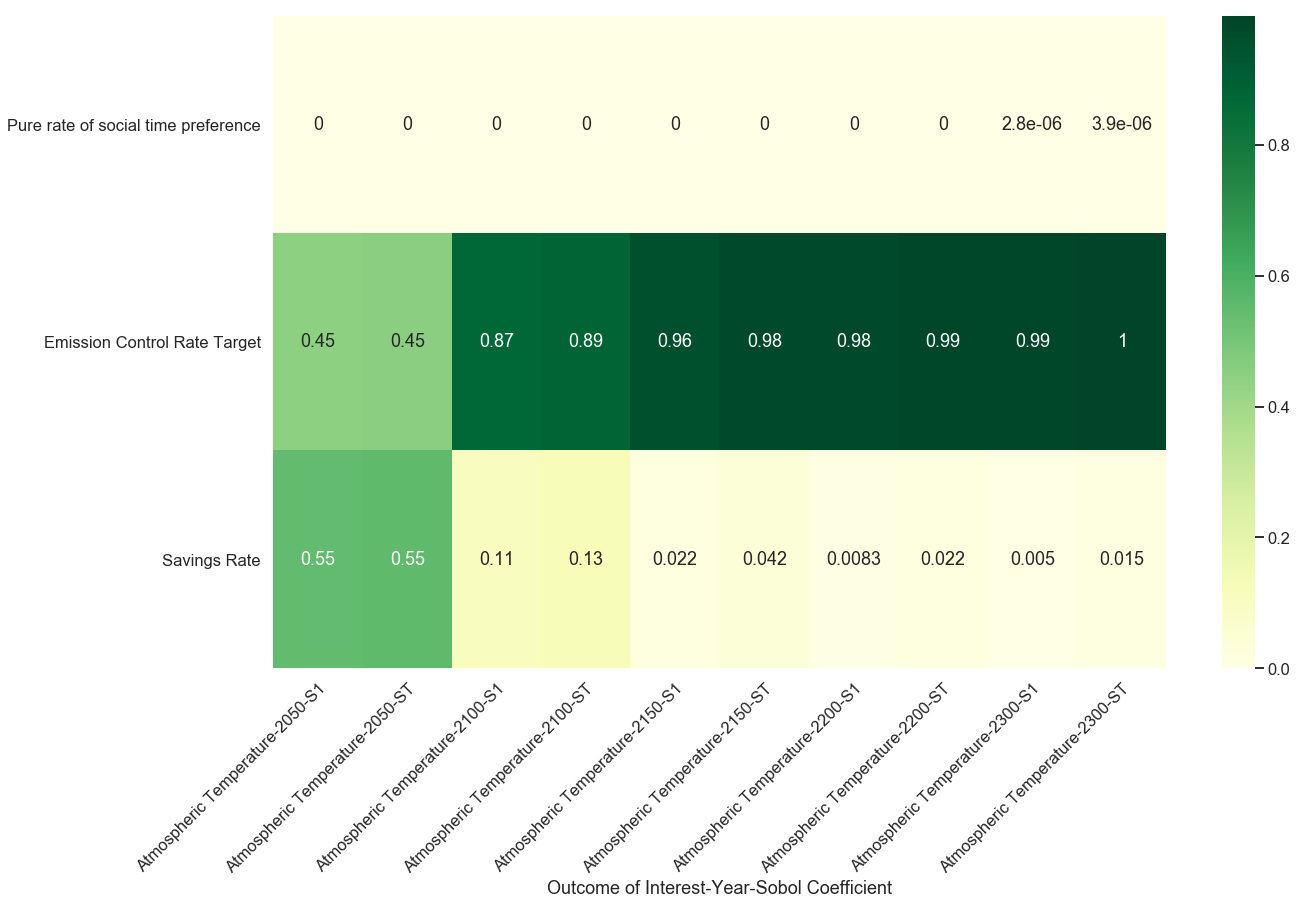

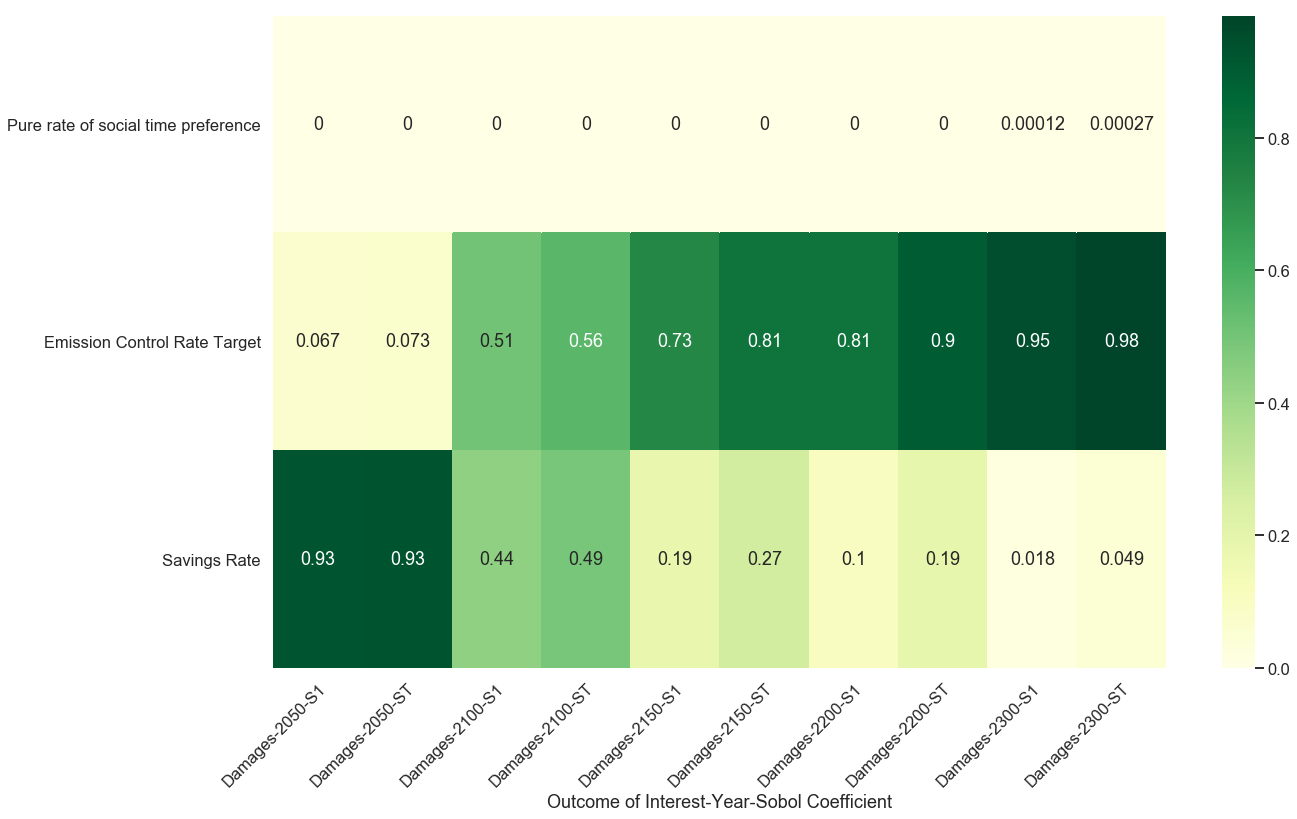

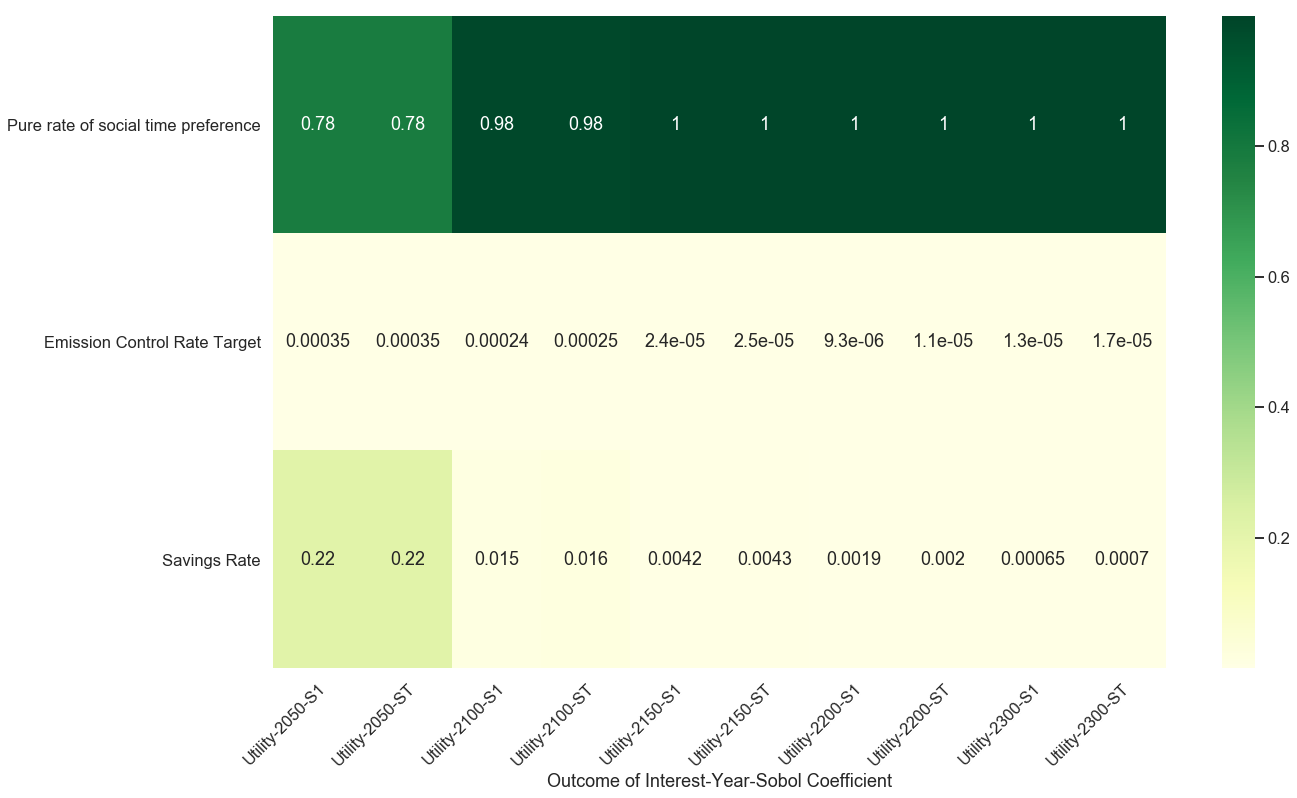

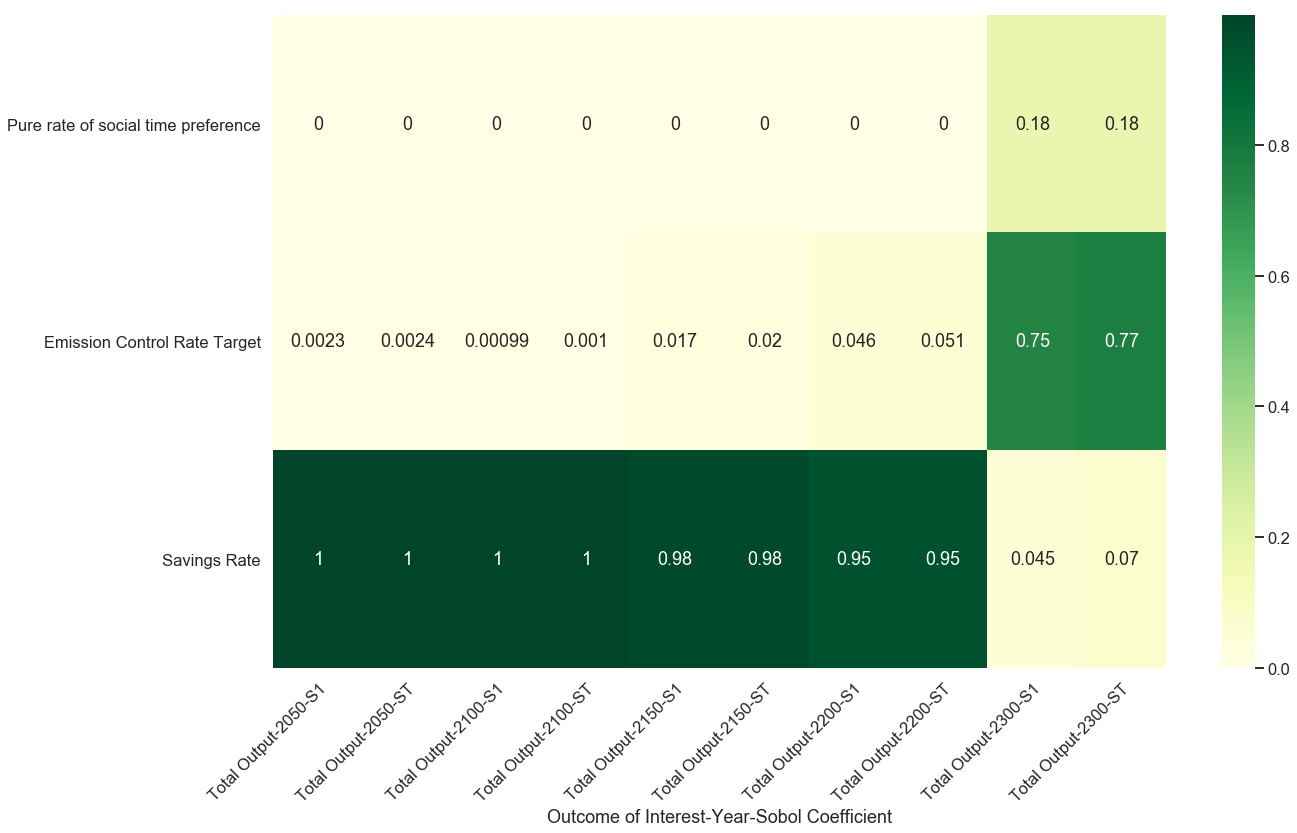

In [40]:
for i in range(4):
    plt.figure(figsize=(20,12))
    sns.set_context("talk")
    fig = sns.heatmap(indicesDF_wo_fptargetDF.iloc[:,10*i:10*i+10], annot=True, cmap="YlGn")
    fig.set_xticklabels(fig.get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right')
    plt.savefig('Sobol_Heatmap_wo_index_Levers' + outcomes_key[i][:-5] + '_scen' + str(10) 
                + 'k' + '.png', bbox_inches='tight')

In [39]:
from plotting_sobol import (plot_sobol_indices, plot_scores)

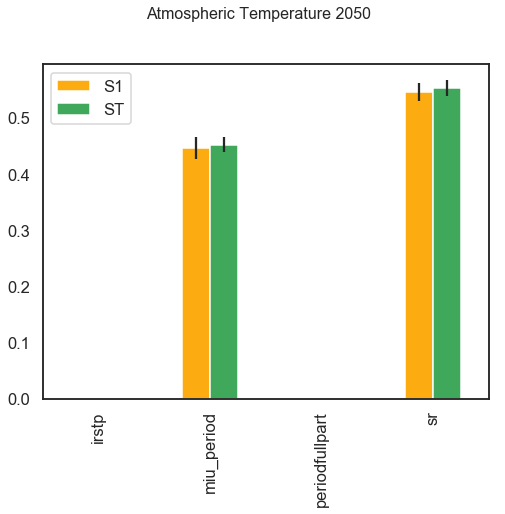

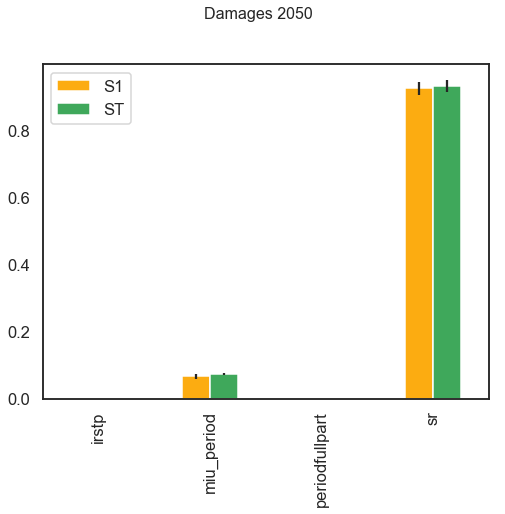

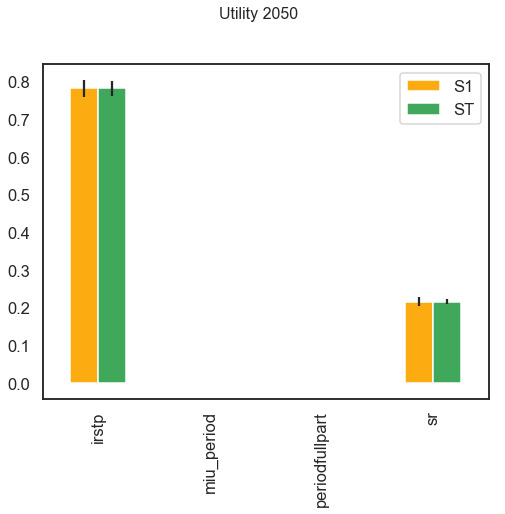

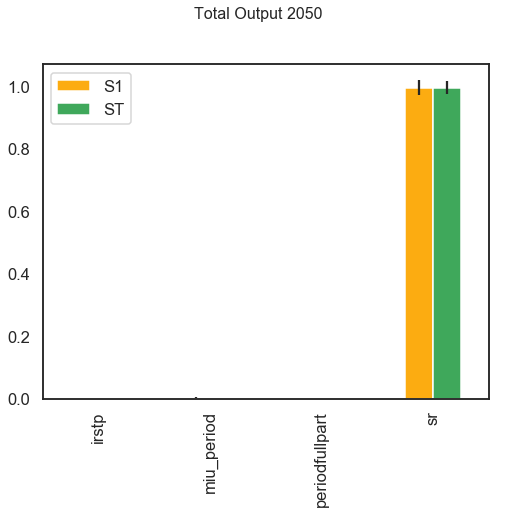

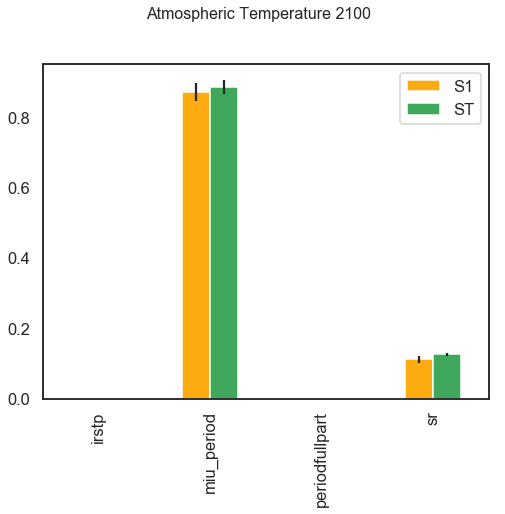

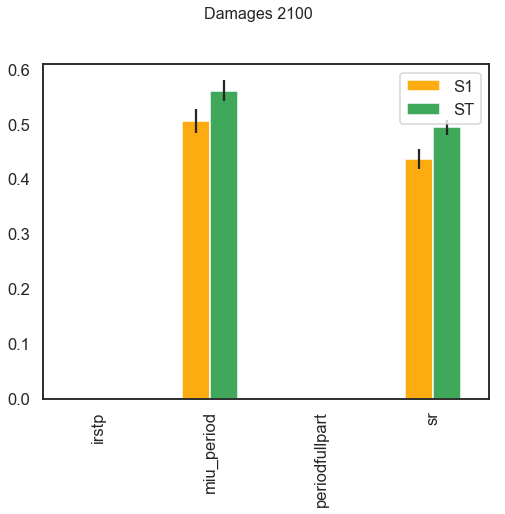

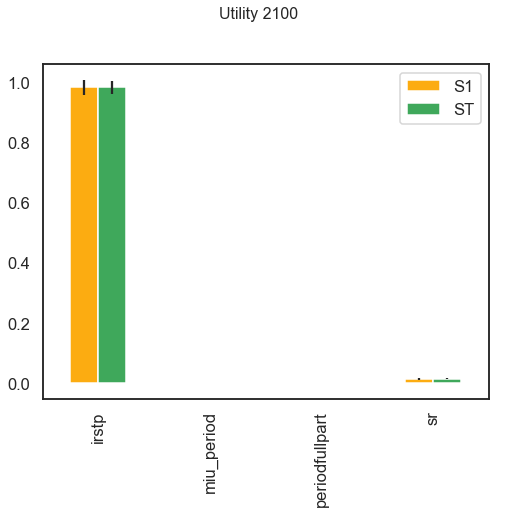

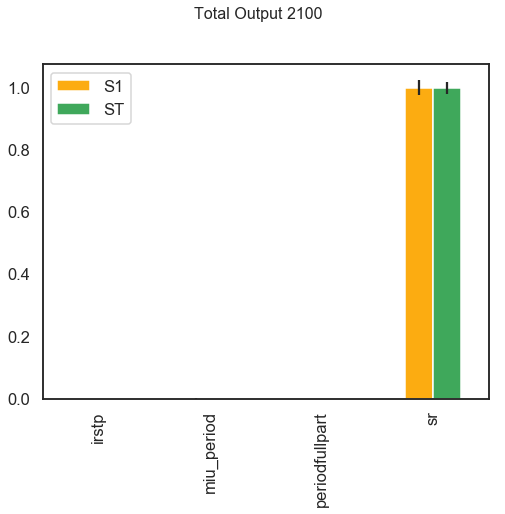

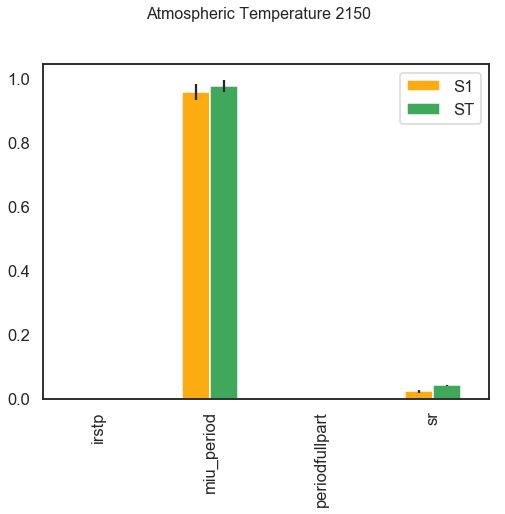

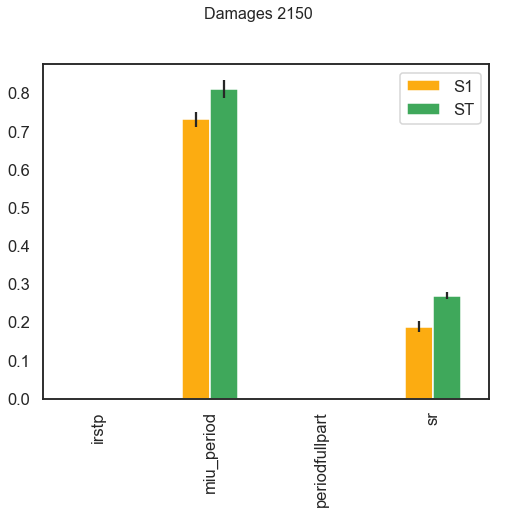

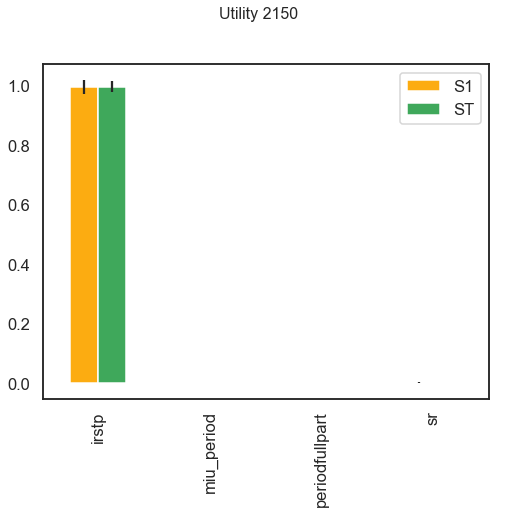

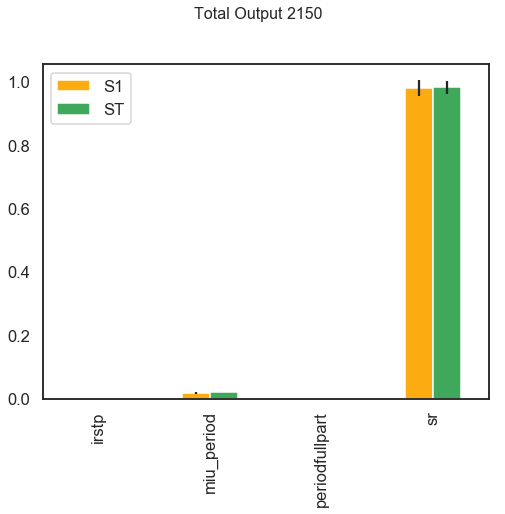

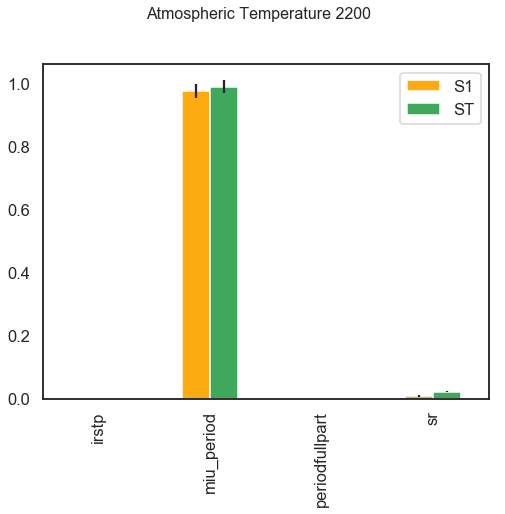

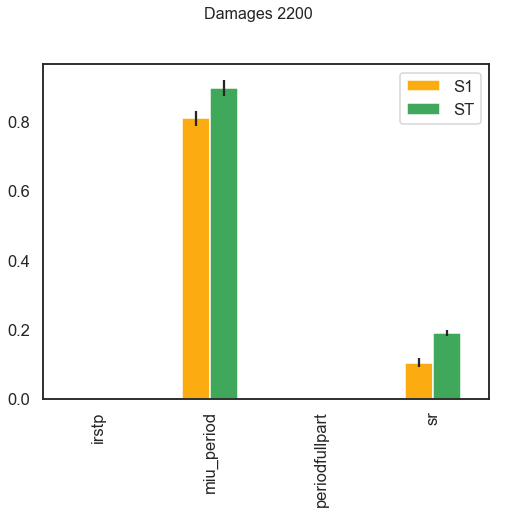

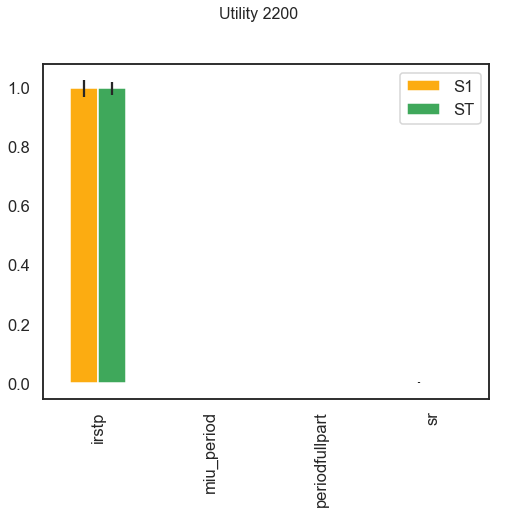

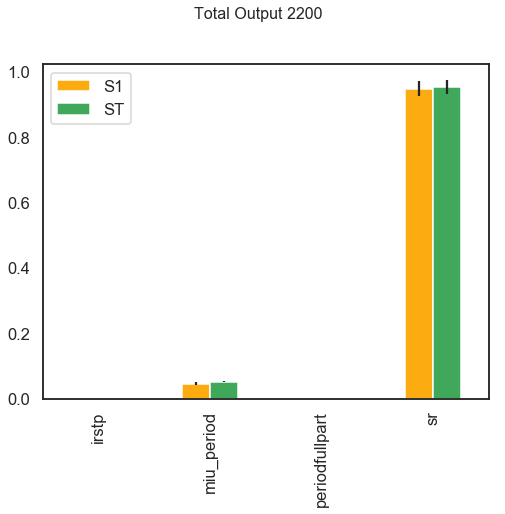

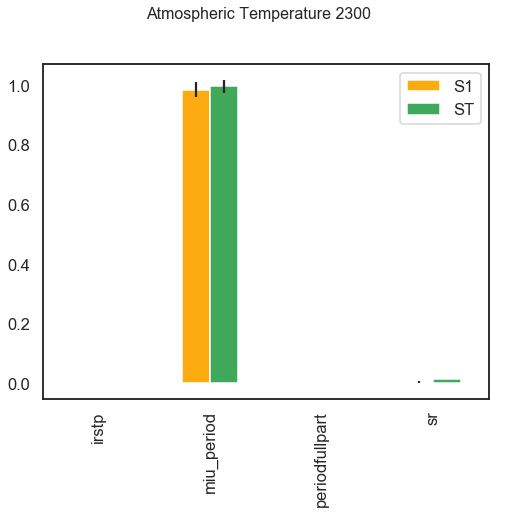

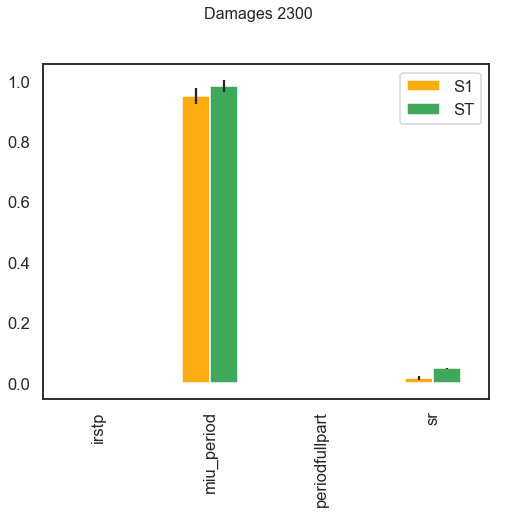

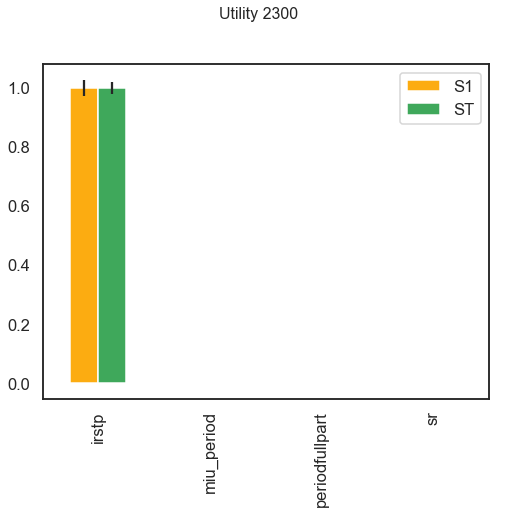

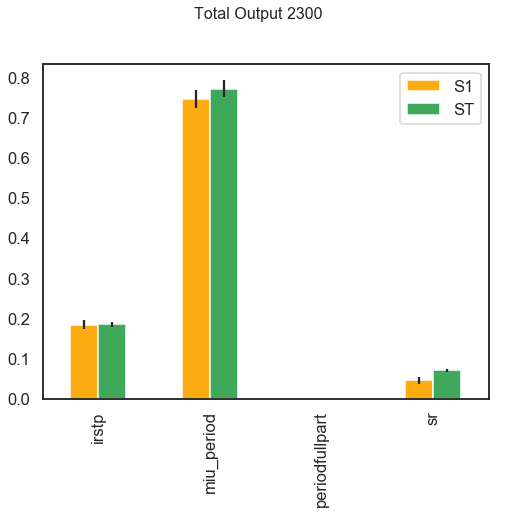

In [41]:
fig = plot_scores(scores[0], problem, outcomes_key[0])
fig.savefig('sobol_levers'+str(outcomes_key[0])+'_V4.png', dpi=fig.dpi)
for i in range(1, len(outcomes_key)): 
    figi = plot_scores(scores[i], problem, outcomes_key[i])
    figi.axes.append(fig)
    figi.savefig('sobol_levers'+str(outcomes_key[i])+'_V4.png', dpi=fig.dpi)
plt.show()